# Problem statement.

* This dataset comprises used cars sold in India as well as important features of these cars.
* Here, user can predict the price of the car based on input features.
* Prediction results can be used to give new seller the price suggestion based on market condition.

# importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from six.moves import urllib

import warnings

warnings.filterwarnings("ignore")

%matplotlib inline
import mysql.connector as connection

# Data Collection

In [2]:
download_dir ="./data/"


download_url = "https://raw.githubusercontent.com/mohitmahiyt/CarPricePredictionDataset/main/cars_dataset.csv"

os.makedirs(download_dir, exist_ok=True)
file_name = os.path.basename(download_url)
print(file_name)

download_file = os.path.join(download_dir, file_name)
print(download_file)

urllib.request.urlretrieve(download_url, download_file)

cars_dataset.csv
./data/cars_dataset.csv


('./data/cars_dataset.csv', <http.client.HTTPMessage at 0x21d91bec280>)

# Data read from local machine

In [3]:
df = pd.read_csv(download_file)
df

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,1,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,2,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,3,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,4,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,5,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,30016,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.60,5998,552.0,4,8100000
15407,30017,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000
15408,30018,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000
15409,30019,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000


In [4]:
range(1,len(df)+1)

range(1, 15412)

In [5]:
df["Unnamed: 0"] = range(1,len(df)+1)
df.rename(columns={'Unnamed: 0': "car_id"}, inplace= True)

In [6]:
df

,car_id,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,1,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,2,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,3,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,4,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,5,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,15407,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.60,5998,552.0,4,8100000
15407,15408,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000
15408,15409,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000
15409,15410,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000


In [7]:
# Load the dataset
data = df.copy()

# Separate the dataset into three tables
car_info = data[["car_id",'car_name', 'brand', 'model', 'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power', 'seats']]
car_usage = data[['car_id', 'vehicle_age', 'km_driven', 'seller_type']]
car_selling_price = data[['car_id', 'selling_price']]

# Save each table to separate CSV files
car_info.to_csv('car_info.csv', index=False)
car_usage.to_csv('car_usage.csv', index=False)
car_selling_price.to_csv('car_selling_price.csv', index=False)

In [8]:
df =df.drop("car_id", axis=1)
df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.60,5998,552.0,4,8100000
15407,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000
15408,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000
15409,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000


In [9]:
def create_db(mydb_connector, db):
    query = f"create database if not exists {db};"
    cursor = mydb_connector.cursor()
    cursor.execute(query)

try:
    mydb = connection.connect(host = "localhost", user="root", password="Remember@123")
    print(mydb.is_connected())
    if mydb.is_connected():
        create_db(mydb, "car_dataset")
        print("database created successfully")
except Exception as e:
    print(e)


1045 (28000): Access denied for user 'root'@'localhost' (using password: YES)


In [10]:
def create_table(mydb_connector, query):
    print(mydb.is_connected())
    if mydb.is_connected():
        cursor = mydb_connector.cursor()
        cursor.execute(query)
    mydb_connector.close()

try:
        mydb = connection.connect(host = "localhost", user="root", password="Remember@123", database = "car_database")

        query = """create table if not exists car_dataset( car_name varchar(30),
    brand varchar(30),model varchar(30),vehicle_age int,km_driven bigint,seller_type varchar(30),
    fuel_type varchar(30),transmission_type varchar(30),mileage float,engine int,max_power float,seats int,selling_price bigint);"""
        create_table(mydb, query)
        print("car dataset table created successfully")
except Exception as e:
    print(e)

1045 (28000): Access denied for user 'root'@'localhost' (using password: YES)


In [11]:
def dataframetosql(mydb_connector,dataframe):
    query = f"delete from car_dataset;"
    cursor = mydb_connector.cursor()
    cursor.execute(query)
    mydb_connector.commit()
    print(len(dataframe.columns))
    for (key, value) in dataframe.iterrows():
        
        car_name = value[0]
        brand = value[1]
        model = value[2]
        vehicle_age = value[3]
        km_driven = value[4]
        seller_type = value[5]
        fuel_type = value[6]
        transmission_type = value[7]
        mileage = value[8]
        engine = value[9]
        max_power = value[10]
        seats = value[11]
        selling_price = value[12]
        
        query = f"INSERT INTO car_dataset VALUES('{car_name}','{brand}','{model}',{vehicle_age},{km_driven},'{seller_type}','{fuel_type}','{transmission_type}',{mileage},{engine},{max_power},{seats},{selling_price});"

        cursor = mydb_connector.cursor()
        cursor.execute(query)
    mydb_connector.commit()

try:
    mydb = connection.connect(host = "localhost", user="root", password="Remember@123", database = "car_database")
    print(mydb.is_connected())
    if mydb.is_connected():
        dataframetosql(mydb, df)
        print("data inserted successfully")
except Exception as e:
    print(e)

1045 (28000): Access denied for user 'root'@'localhost' (using password: YES)


In [12]:
def create_table(mydb_connector, query):
    print(mydb.is_connected())
    if mydb.is_connected():
        cursor = mydb_connector.cursor()
        cursor.execute(query)
    mydb_connector.close()

try:
        mydb = connection.connect(host = "localhost", user="root", password="075470", database = "car_database")

        query = """create table if not exists car_dataset( car_name varchar(30),
    brand varchar(30),model varchar(30),vehicle_age int,km_driven bigint,seller_type varchar(30),
    fuel_type varchar(30),transmission_type varchar(30),mileage float,engine int,max_power float,seats int,selling_price bigint);"""
        create_table(mydb, query)
        print("car dataset table created successfully")
except Exception as e:
    print(e)

1049 (42000): Unknown database 'car_database'


In [13]:
df=pd.DataFrame.from_records(data, columns=['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'])

In [14]:
df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.60,5998,552.0,4,8100000
15407,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000
15408,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000
15409,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000


import mysql.connector as connection

def create_db(mydb_connector):
    query = "create database if not exists car_database;"
    cursor = mydb_connector.cursor()
    cursor.execute(query)


try:
    mydb = connection.connect(host = "localhost", user="root", password="Remember@123")
    print(mydb.is_connected())
    if mydb.is_connected():
        create_db(mydb)
        print("database created successfully")
except Exception as e:
    print(e)

def create_table(mydb_connector, query):
    mydb = connection.connect(host = "localhost", user="root", password="Remember@123", database = "car_database")
    print(mydb.is_connected())
    if mydb.is_connected():
        cursor = mydb_connector.cursor()
        cursor.execute(query)
    mydb_connector.close()

try:
    
        query = """create table if not exists car_dataset( car_id int primary key,car_name varchar(30),
    brand varchar(30),model varchar(30),vehicle_age int,km_driven bigint,seller_type varchar(30),
    fuel_type varchar(30),transmission_type varchar(30),mileage float,engine int,max_power float,seats int,selling_price bigint);"""
        create_table(mydb, query)
        print("raw car dataset table created successfully")


        query = """create table if not exists car_info(car_id int primary key,car_name varchar(30),brand varchar(30),model varchar(30),fuel_type varchar(30),transmission_type varchar(30),mileage float,engine int,max_power float,seats int);"""
        create_table(mydb, query)
        print("car info table created successfully")


        query = """create table if not exists car_usage(car_id int primary key,
        vehicle_age int,
        km_driven bigint,
        seller_type varchar(30);"""
        create_table(mydb, query)
        print("car usage table created successfully")

        # query = """create table if not exists car_selling_price(car_id int primary key, selling_price bigint);"""
        # create_table(mydb, query)
        # print("car selling price table created successfully")
except Exception as e:
    print(e)

def dataframetosql(mydb_connector,dataframe):
    query = f"delete from car_dataset;"
    cursor = mydb_connector.cursor()
    cursor.execute(query)
    mydb_connector.commit()
    print(len(dataframe.columns))
    for (key, value) in dataframe.iterrows():
        car_id = value[0]
        car_name = value[1]
        brand = value[2]
        model = value[3]
        vehicle_age = value[4]
        km_driven = value[5]
        seller_type = value[6]
        fuel_type = value[7]
        transmission_type = value[8]
        mileage = value[9]
        engine = value[10]
        max_power = value[11]
        seats = value[12]
        selling_price = value[13]
        
        query = f"INSERT INTO car_dataset VALUES({car_id},'{car_name}','{brand}','{model}',{vehicle_age},{km_driven},'{seller_type}','{fuel_type}','{transmission_type}',{mileage},{engine},{max_power},{seats},{selling_price});"

        cursor = mydb_connector.cursor()
        cursor.execute(query)
    mydb_connector.commit()

try:
    mydb = connection.connect(host = "localhost", user="root", password="Remember@123", database = "car_database")
    print(mydb.is_connected())
    if mydb.is_connected():
        dataframetosql(mydb, df)
        print("data inserted successfully")
except Exception as e:
    print(e)

In [15]:
# top 5 datasets
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000


In [16]:
df.sample()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
1430,Renault KWID,Renault,KWID,1,5000,Individual,Petrol,Automatic,24.04,999,67.0,5,472000


In [17]:
# bottom 5 datasets
df.tail()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
15406,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.6,5998,552.0,4,8100000
15407,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.2,6592,563.0,4,24200000
15408,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.0,5998,600.0,5,5200000
15409,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.0,3855,601.0,4,39500000
15410,Bentley Continental,Bentley,Continental,9,9000,Dealer,Petrol,Automatic,9.5,5998,626.0,4,14500000


In [18]:
df.shape 

(15411, 13)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [20]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [21]:
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

In [22]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [23]:
df.describe(include='object')

,car_name,brand,model,seller_type,fuel_type,transmission_type
count,15411,15411,15411,15411,15411,15411
unique,121,32,120,3,5,2
top,Hyundai i20,Maruti,i20,Dealer,Petrol,Manual
freq,906,4992,906,9539,7643,12225


In [24]:
df.dtypes

car_name              object
brand                 object
model                 object
vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

# EDA => Exploratory Data Analysis

In [25]:
df["car_name"].dtype

dtype('O')

In [26]:
df['car_name'].dtype == 'O'

True

In [27]:
df["max_power"].dtype != 'O'

True

In [28]:
df['seats'].dtype != 'O'

True

In [29]:
df["car_name"].dtype == 'O'

True

In [30]:
df["car_name"].dtype != 'O'

False

In [31]:
df['car_name'].dtype 


dtype('O')

In [32]:
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

In [33]:
[feature for feature in df.columns if df[feature].dtype == 'O']

['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

In [34]:
[feature for feature in df.columns if df[feature].dtype != 'O']

['vehicle_age',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'seats',
 'selling_price']

In [35]:
# filtering the numerical and categorical data using list comprehension

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(f'We have {len(numeric_features)} numerical features : {numeric_features}')
print(f'We have {len(categorical_features)} categorical features : {categorical_features}')

We have 7 numerical features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
We have 6 categorical features : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


### Feature Information
* **car_name:** Car's Full name, which includes brand and specific model name.
* **brand:** Brand Name of the particular car.
* **model:** Exact model name of the car of a particular brand.
* **seller_type:** Which Type of seller is selling the used car
* **fuel_type:** Fuel used in the used car, which was put up on sale.
* **transmission_type:** Transmission used in the used car, which was put on sale.
* **vehicle_age:** The count of years since car was bought.
* **mileage:** It is the number of kilometer the car runs per litre.
* **engine:** It is the engine capacity in cc(cubic centimeters)
* **max_power:** Max power it produces in BHP.
* **seats:** Total number of seats in car.
* **selling_price:** The sale price which was put up on website.

In [36]:
print("Missing value present in different columns of DataFrame are as follows: ")
print('-'*100)
total = df.isnull().sum().sort_values(ascending=False)
#percent = (df.isnull().sum()/df.isnull().sum().count()*100).sort_values(ascending=False)
percent = (df.isnull().mean()).sort_values(ascending=False)

pd.DataFrame({"Total":total, "Percentage":percent})

Missing value present in different columns of DataFrame are as follows: 
----------------------------------------------------------------------------------------------------


,Total,Percentage
car_name,0,0.0
brand,0,0.0
model,0,0.0
vehicle_age,0,0.0
km_driven,0,0.0
seller_type,0,0.0
fuel_type,0,0.0
transmission_type,0,0.0
mileage,0,0.0
engine,0,0.0


In [37]:
categorical_features

['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

In [38]:
for col in categorical_features:
    print((df[col].value_counts(normalize=True)*100).to_string())

car_name
Hyundai i20               5.878918
Maruti Swift Dzire        5.775096
Maruti Swift              5.067809
Maruti Alto               5.048342
Honda City                4.912076
Maruti Wagon R            4.652521
Hyundai Grand             3.763546
Toyota Innova             3.536435
Hyundai Verna             3.192525
Hyundai i10               2.660437
Ford Ecosport             2.426838
Volkswagen Polo           2.420349
Maruti Baleno             2.361949
Honda Amaze               2.348972
Maruti Ciaz               2.245150
Maruti Ertiga             2.225683
Hyundai Creta             2.180261
Mahindra XUV500           2.141328
Renault KWID              1.985595
Maruti Vitara             1.914217
Mahindra Scorpio          1.771462
Ford Figo                 1.758484
Volkswagen Vento          1.602751
Maruti Celerio            1.537863
Renault Duster            1.414574
Mahindra Bolero           1.369152
Toyota Fortuner           1.213419
Skoda Rapid               1.180975
Honda Jazz 

In [39]:
# propotion of each unique value in categorical variable

for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print()
    print("---"*50)
    print()

car_name
Hyundai i20           5.878918
Maruti Swift Dzire    5.775096
Maruti Swift          5.067809
Maruti Alto           5.048342
Honda City            4.912076
                        ...   
Maserati Ghibli       0.006489
Hyundai Aura          0.006489
Force Gurkha          0.006489
Isuzu MUX             0.006489
Ferrari GTC4Lusso     0.006489
Name: proportion, Length: 121, dtype: float64

------------------------------------------------------------------------------------------------------------------------------------------------------

brand
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.848615
Tata              2.790215
Mercedes-Benz     2.186750
Skoda             2.167283
Audi              1.245863
Datsun            1.103108
Jaguar            0.382843
Land Rover        0.330932
Jeep         

# Univariate Analysis
* The term univariate analysis refers to the analysis of one variable prefix "uni" means "one". The purpose of univariate analysis is to understand the distribution of values for a single variable.

**Note=> Explaination=> if you need to analyze the specific feature and not compare with any other features as such. then it is said to be Univariate analysis.**

# Numerical features

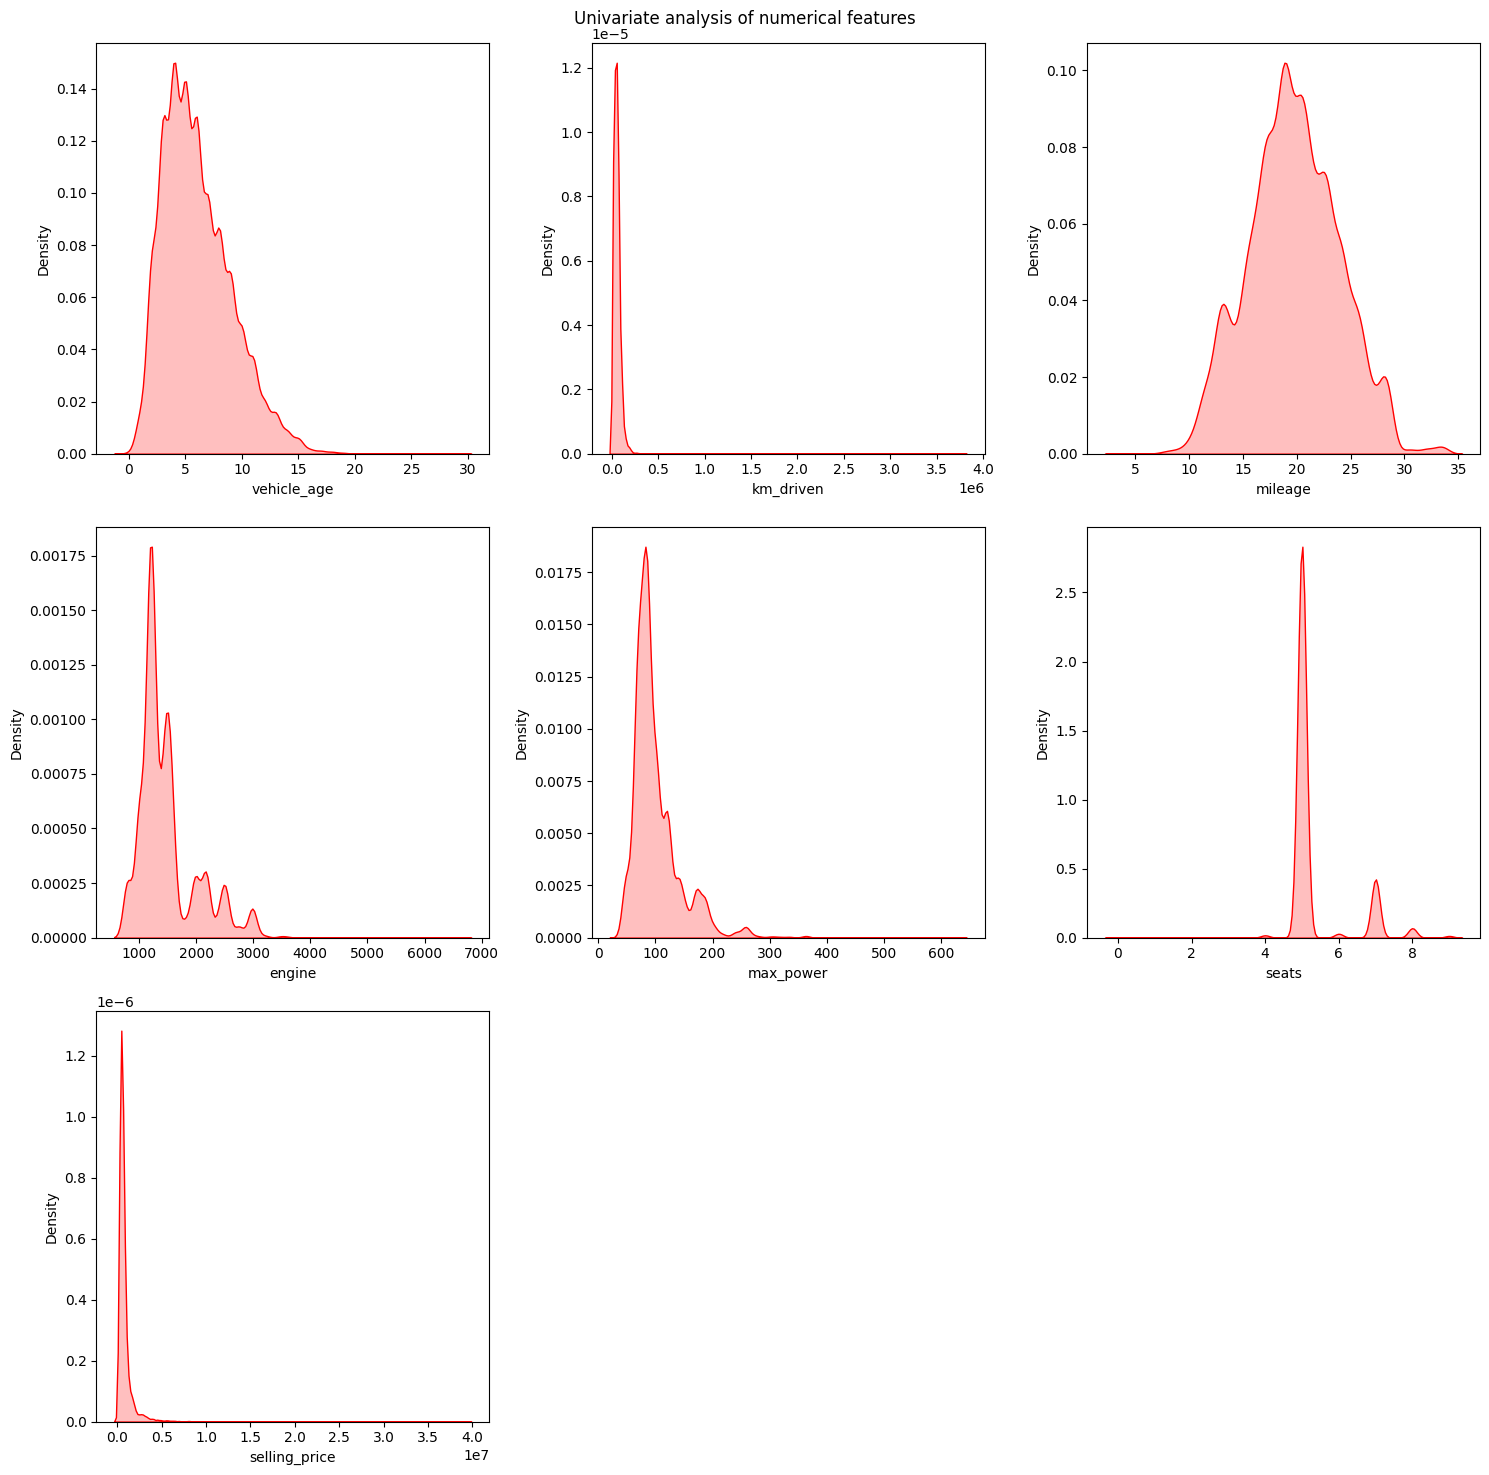

In [40]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate analysis of numerical features")

for i in range(len(numeric_features)):
    plt.subplot(3,3,i+1)
    #sns.histplot(x= df[numeric_features[i]],kde=True)
    sns.kdeplot(x= df[numeric_features[i]], color='r', shade=True)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    

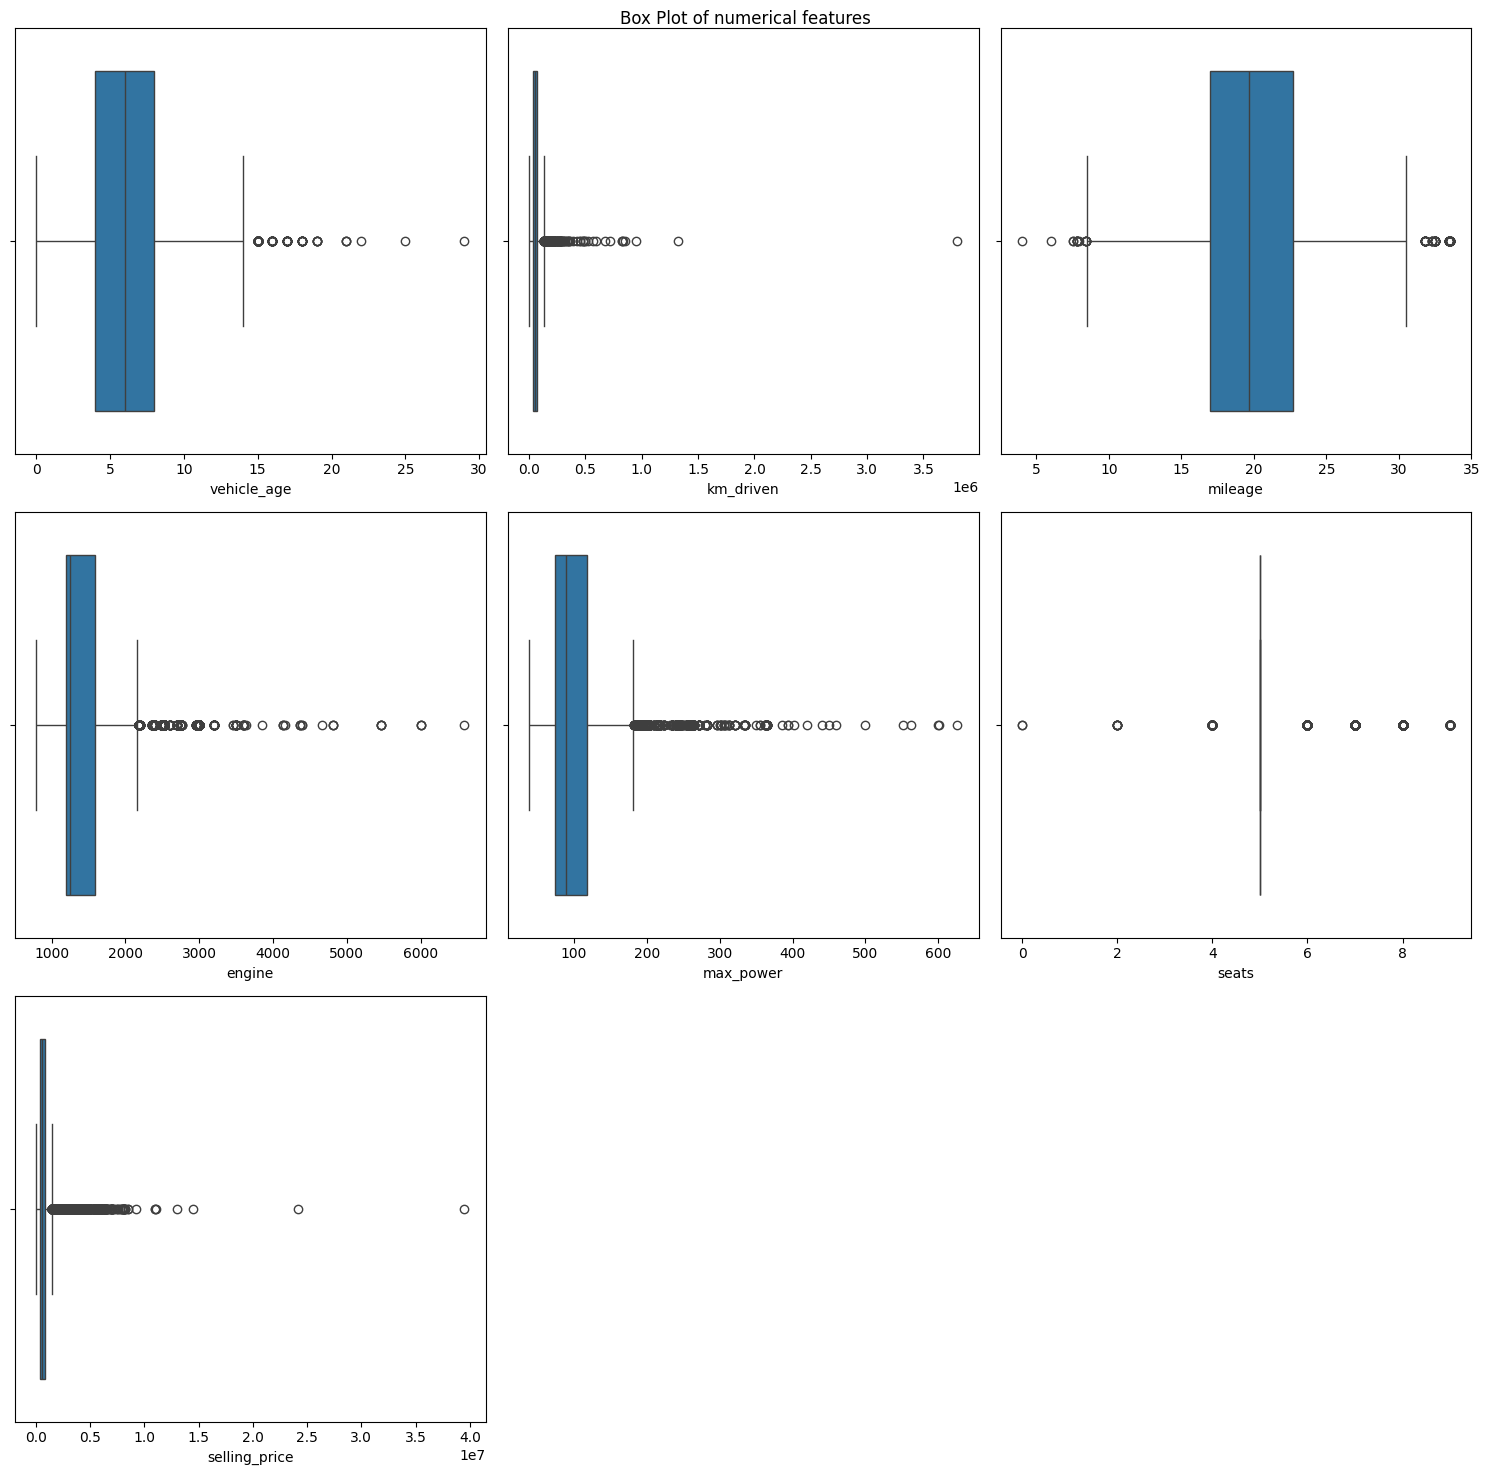

In [41]:
plt.figure(figsize=(15,15))

plt.suptitle("Box Plot of numerical features")

for i in range(len(numeric_features)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x= df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

# categorical features


In [42]:
df[categorical_features]

,car_name,brand,model,seller_type,fuel_type,transmission_type
0,Maruti Alto,Maruti,Alto,Dealer,CNG,Manual
1,Maruti Alto,Maruti,Alto,Dealer,CNG,Manual
2,Maruti Alto,Maruti,Alto,Dealer,CNG,Manual
3,Maruti Alto,Maruti,Alto,Dealer,CNG,Manual
4,Maruti Alto,Maruti,Alto,Individual,CNG,Manual
...,...,...,...,...,...,...
15406,Bentley Continental,Bentley,Continental,Dealer,Petrol,Automatic
15407,Rolls-Royce Ghost,Rolls-Royce,Ghost,Individual,Petrol,Automatic
15408,Bentley Continental,Bentley,Continental,Dealer,Petrol,Automatic
15409,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,Dealer,Petrol,Automatic


In [43]:
df['brand'].value_counts().index

Index(['Maruti', 'Hyundai', 'Honda', 'Mahindra', 'Toyota', 'Ford',
       'Volkswagen', 'Renault', 'BMW', 'Tata', 'Mercedes-Benz', 'Skoda',
       'Audi', 'Datsun', 'Jaguar', 'Land Rover', 'Jeep', 'Kia', 'Porsche',
       'Volvo', 'MG', 'Mini', 'Nissan', 'Lexus', 'Isuzu', 'Bentley', 'ISUZU',
       'Maserati', 'Force', 'Mercedes-AMG', 'Rolls-Royce', 'Ferrari'],
      dtype='object', name='brand')

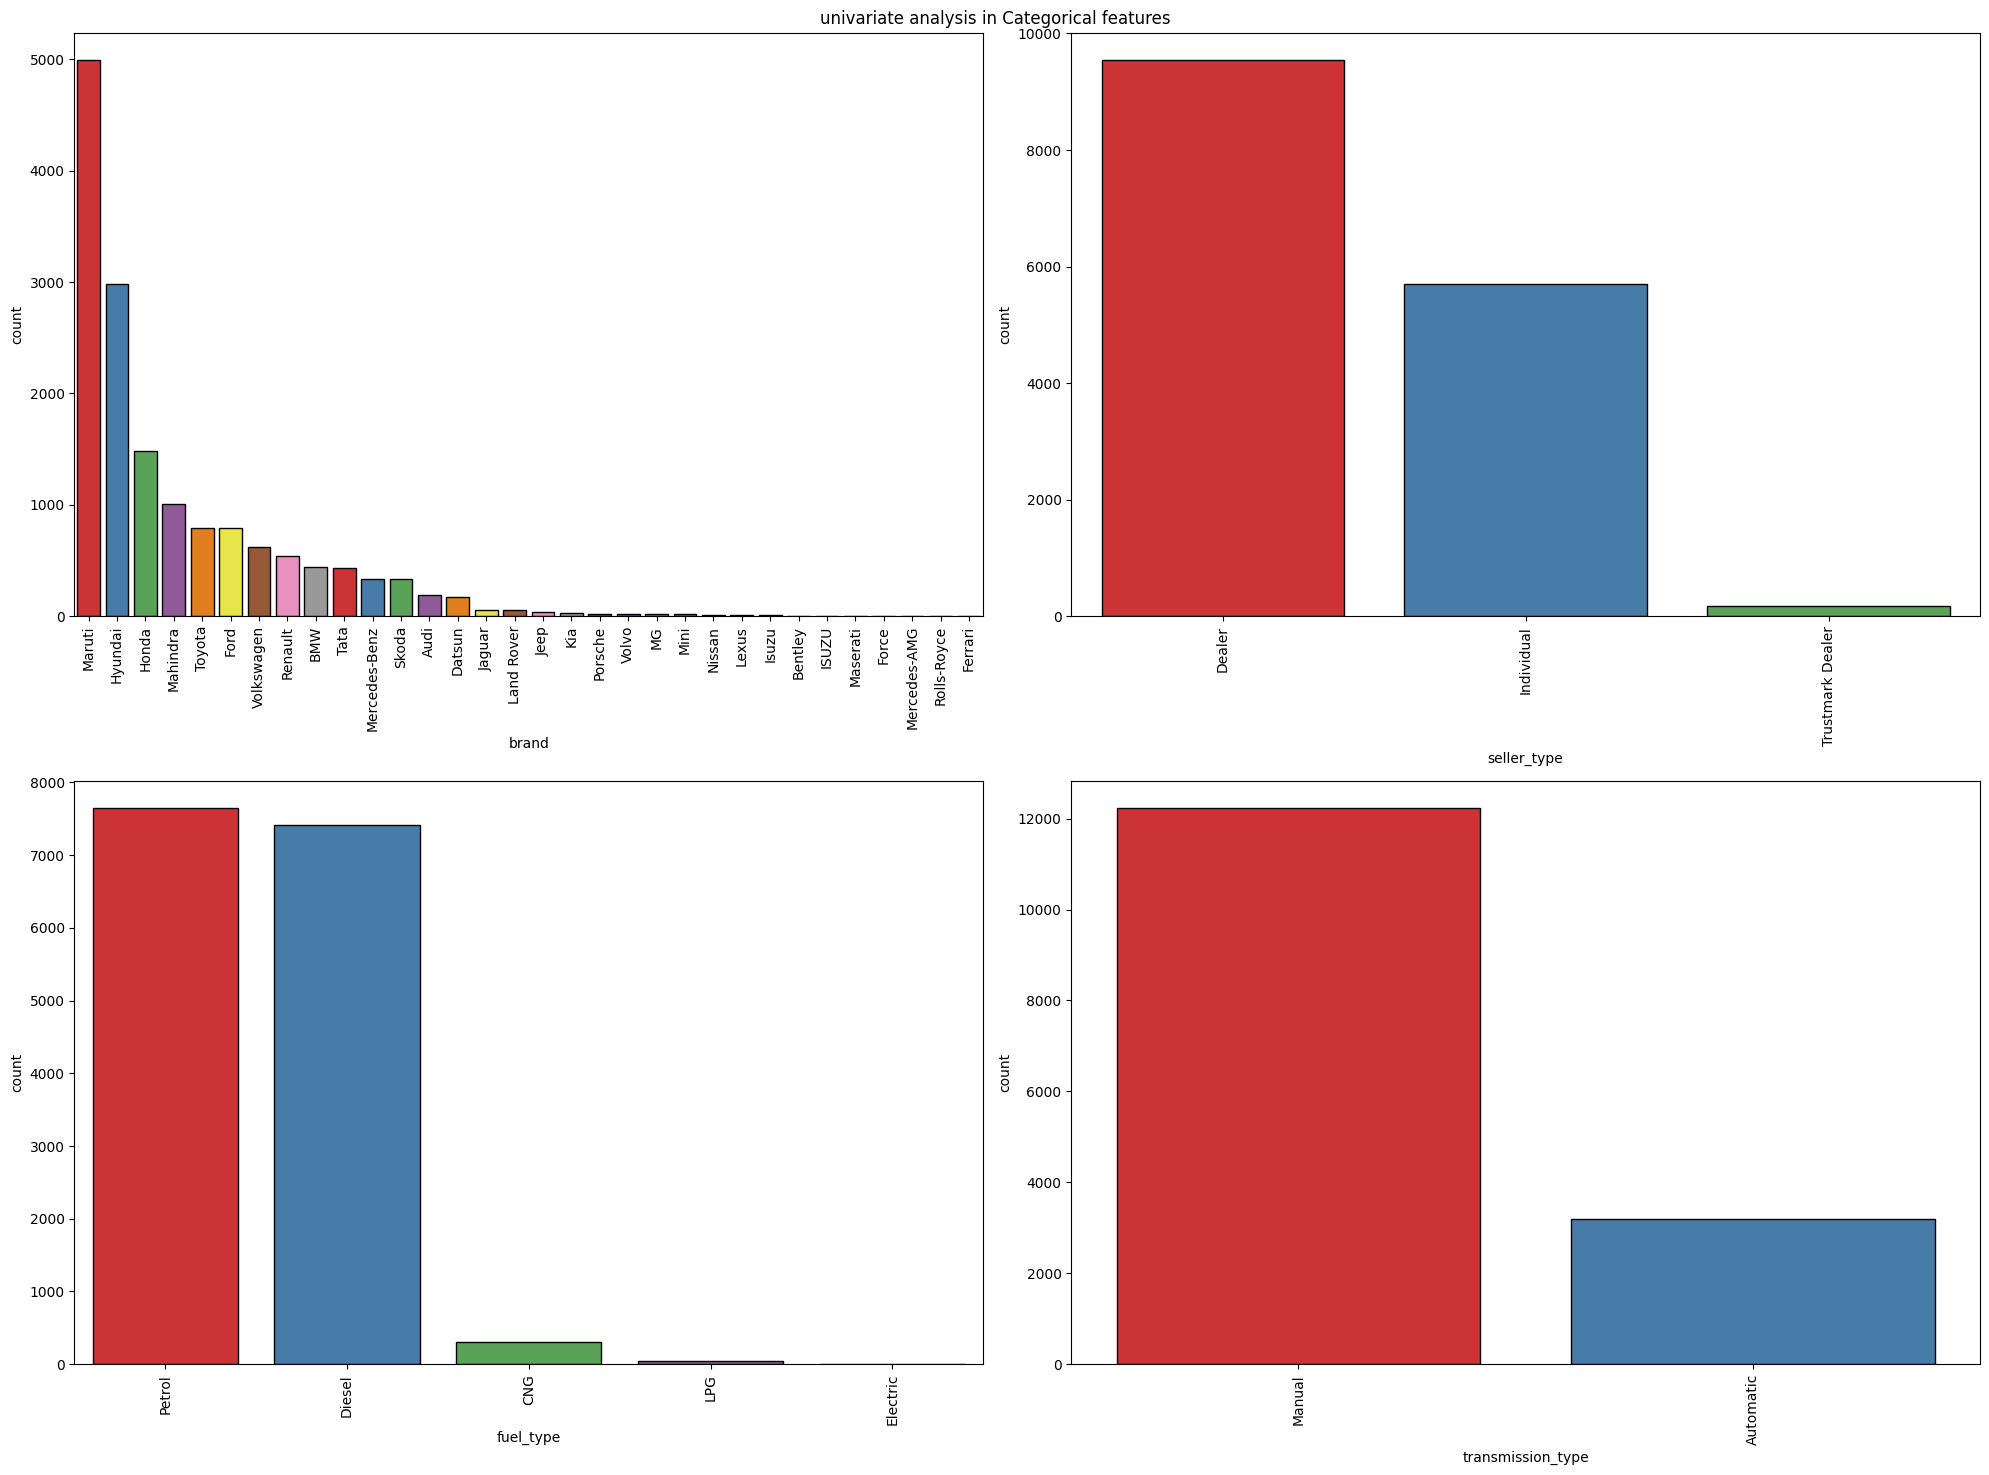

In [44]:
# categorical features
plt.figure(figsize= (20,15))
plt.suptitle("univariate analysis in Categorical features")
cat = ["brand", "seller_type", "fuel_type", "transmission_type"]
for i in range(len(cat)) :
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat[i]], palette="Set1", edgecolor = "black", order=df[cat[i]].value_counts().index)
    plt.xticks(rotation=90)
    plt.xlabel(cat[i])
    plt.tight_layout()


# multi-variant analysis


In [45]:
df[numeric_features].corr()*100

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,100.000000,33.389144,-25.739392,9.896514,0.520825,3.079110,-24.185146
km_driven,33.389144,100.000000,-10.523928,19.288459,4.442093,19.283042,-8.003045
mileage,-25.739392,-10.523928,100.000000,-63.298707,-53.312793,-44.027982,-30.554885
engine,9.896514,19.288459,-63.298707,100.000000,80.736842,55.123560,58.584367
max_power,0.520825,4.442093,-53.312793,80.736842,100.000000,17.225684,75.023608
seats,3.079110,19.283042,-44.027982,55.123560,17.225684,100.000000,11.503287
selling_price,-24.185146,-8.003045,-30.554885,58.584367,75.023608,11.503287,100.000000


<Axes: >

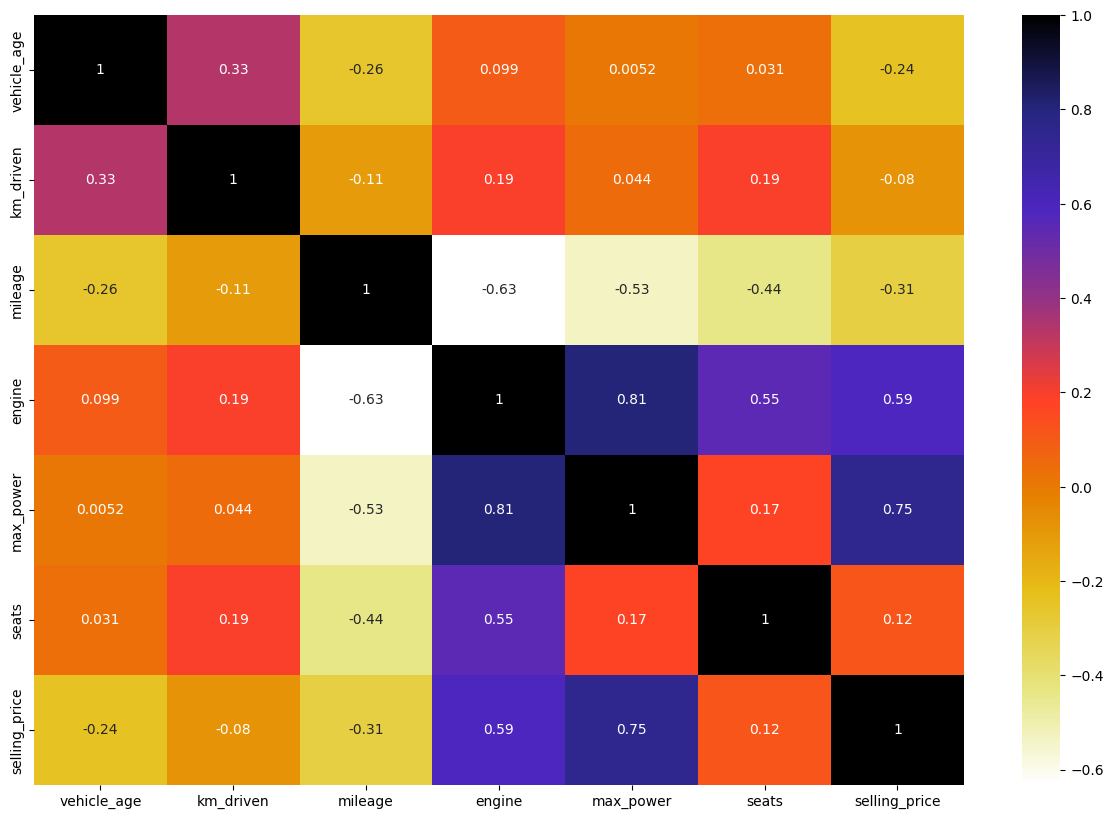

In [46]:
plt.figure(figsize = (15,10))
#sns.heatmap(df.corr(), cmap="CMRmap_r", annot=True)
sns.heatmap(df[numeric_features].corr(), annot=True, cmap="CMRmap_r")


# Checking the Outliers


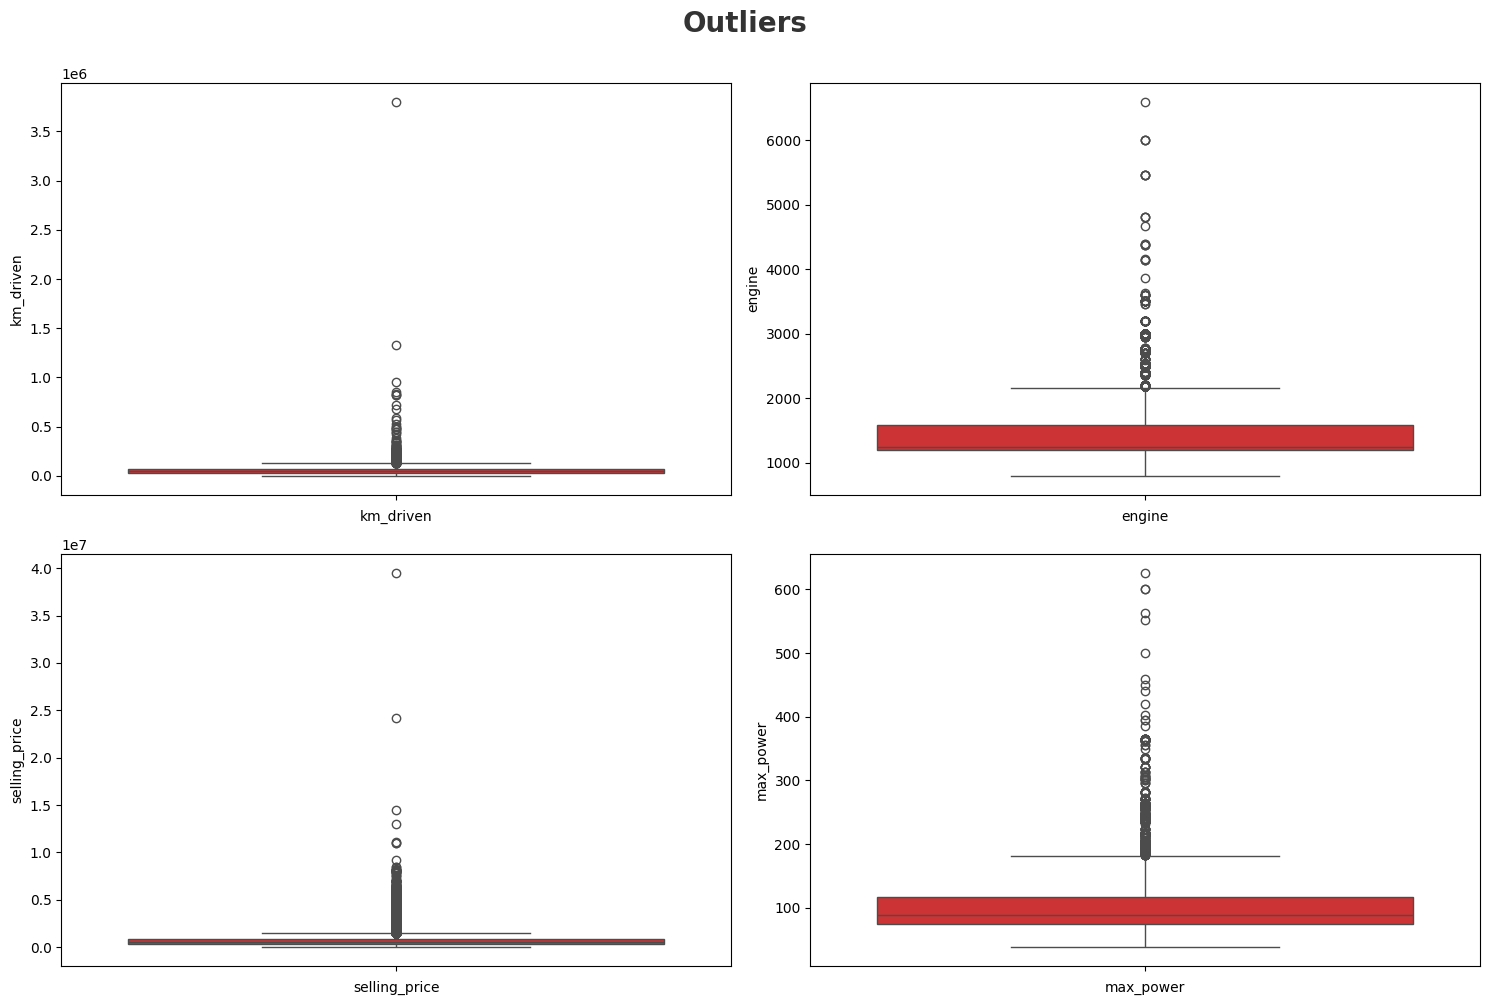

In [47]:
plt.figure(figsize=(15,10))
plt.suptitle("Outliers", fontsize=20, fontweight="bold",alpha=0.8,y=1)

outliers= ['km_driven', 'engine', 'selling_price','max_power']
# outliers= numeric_features
for i in range(len(outliers)):
    #plt.subplot(4,2,i+1)
    plt.subplot(2,2,i+1)
    sns.boxplot(df[outliers[i]],palette="Set1")
    plt.xlabel(outliers[i])
    plt.tight_layout()

# Outlier detection and removal using IQR

In [48]:
# total_number_of_outliers_detected = []

# def outlier_detection_and_removal(df1, col_name):

#   print("-------------------------------------------------------------------------------\n")
#   print(col_name)
#   print()
#   print()
#   Q1 = df1[col_name].quantile(0.25)
#   Q3 = df1[col_name].quantile(0.75)

#   print(f"Q1={Q1}, Q3={Q3}")

#   IQR = Q3 - Q1
#   print(f"IQR={IQR}")

#   lower_limit = Q1 - 1.5*IQR
#   upper_limit = Q3 + 1.5*IQR
#   print(f"lower_limit= {lower_limit}, upper_limit = {upper_limit}")

#   outlier_detected = df1[(df1[col_name]<lower_limit) | (df1[col_name]>upper_limit)]
#   total_number_of_outliers_detected.append(len(outlier_detected))
#   #print(outlier_detected)

#   df1 = df1[(df1[col_name]>=lower_limit) & (df1[col_name]<=upper_limit)] # outliers removed from each column
#   return df1
#   #print(df1)

# df1 = df.copy()
# for i in outliers:

#   df1 = outlier_detection_and_removal(df1, i)
#   print(df1)

# print(total_number_of_outliers_detected,": total outliers=>",sum(total_number_of_outliers_detected))



In [49]:
#df1

In [50]:
#df1.reset_index(inplace=True)

In [51]:
#df1.drop(columns=['index'], axis=1, inplace=True)

In [52]:
#df1.to_csv("cleaned_cars.csv", index=False)

In [53]:
# # Checking the Box plot after removing outliers
# plt.figure(figsize=(15,5))
# plt.suptitle("Outliers", fontsize=20, fontweight="bold",alpha=0.8,y=1)

# outliers= ['km_driven', 'engine', 'selling_price','max_power']
# # outliers= numeric_features
# for i in range(len(outliers)):
#     plt.subplot(2,2,i+1)
#     sns.boxplot(df1[outliers[i]], color='green')
#     plt.xlabel(outliers[i], color= 'r')
#     plt.tight_layout()

# insights from the data visualization

Selling price distribution

In [54]:
df['selling_price']

0          235000
1          185000
2          150000
3          172000
4          125000
           ...   
15406     8100000
15407    24200000
15408     5200000
15409    39500000
15410    14500000
Name: selling_price, Length: 15411, dtype: int64

(0.0, 3000000.0)

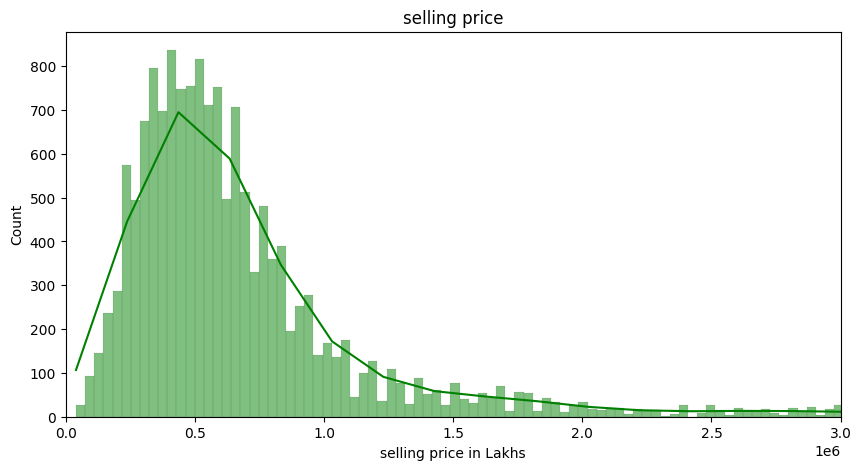

In [55]:
plt.figure(figsize=(10,5))
sns.histplot(df["selling_price"], kde=True,color='g')
plt.title("selling price")
plt.xlabel('selling price in Lakhs')
plt.xlim(0,3000000)

In [56]:
# most cars sold on dataset
df["car_name"].value_counts()

car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
                     ... 
Maserati Ghibli         1
Hyundai Aura            1
Force Gurkha            1
Isuzu MUX               1
Ferrari GTC4Lusso       1
Name: count, Length: 121, dtype: int64

In [57]:
# top 10 most cars sold on cars_dataset
df["car_name"].value_counts()[0:10]

car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: count, dtype: int64

- observation
- Hyndai i20 is most sold car

In [58]:
df["car_name"].value_counts().head(10)

car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: count, dtype: int64

In [59]:
df["car_name"].value_counts().index[0:10]

Index(['Hyundai i20', 'Maruti Swift Dzire', 'Maruti Swift', 'Maruti Alto',
       'Honda City', 'Maruti Wagon R', 'Hyundai Grand', 'Toyota Innova',
       'Hyundai Verna', 'Hyundai i10'],
      dtype='object', name='car_name')

In [60]:
df["car_name"].value_counts().head(10).index

Index(['Hyundai i20', 'Maruti Swift Dzire', 'Maruti Swift', 'Maruti Alto',
       'Honda City', 'Maruti Wagon R', 'Hyundai Grand', 'Toyota Innova',
       'Hyundai Verna', 'Hyundai i10'],
      dtype='object', name='car_name')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Hyundai i20'),
  Text(1, 0, 'Maruti Swift Dzire'),
  Text(2, 0, 'Maruti Swift'),
  Text(3, 0, 'Maruti Alto'),
  Text(4, 0, 'Honda City'),
  Text(5, 0, 'Maruti Wagon R'),
  Text(6, 0, 'Hyundai Grand'),
  Text(7, 0, 'Toyota Innova'),
  Text(8, 0, 'Hyundai Verna'),
  Text(9, 0, 'Hyundai i10')])

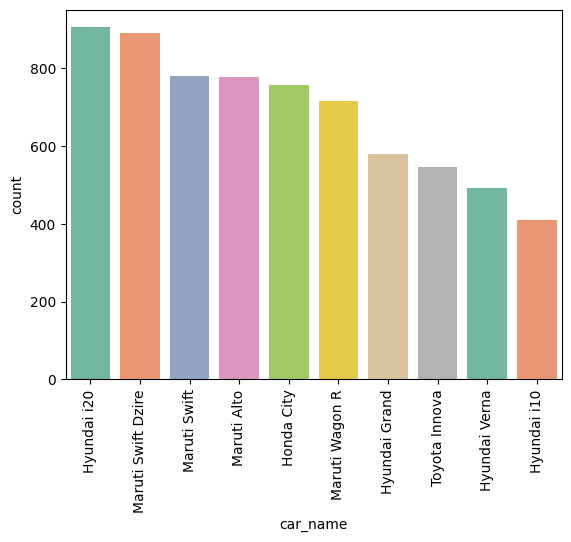

In [61]:
sns.countplot(x="car_name",palette="Set2", data = df, order=df["car_name"].value_counts().head(10).index)
plt.xticks(rotation = 90)

In [62]:
df[df['car_name'] == 'Hyundai i20'].selling_price.mean()

543603.7527593819

In [63]:
# mean of i20 to find one car price
i20 = df[df["car_name"] == 'Hyundai i20']
selling_price_i20 = i20.selling_price.mean()
print("the average mean price of i20 is", selling_price_i20)
av_share_i20 = df["car_name"].value_counts(normalize=True)*100
print("the average share of hyundai i20 is", round(av_share_i20[0],2), "%")

the average mean price of i20 is 543603.7527593819
the average share of hyundai i20 is 5.88 %


# most sold car by brand

In [64]:
df.brand.value_counts().head(10)

brand
Maruti        4992
Hyundai       2982
Honda         1485
Mahindra      1011
Toyota         793
Ford           790
Volkswagen     620
Renault        536
BMW            439
Tata           430
Name: count, dtype: int64

<Axes: xlabel='brand', ylabel='count'>

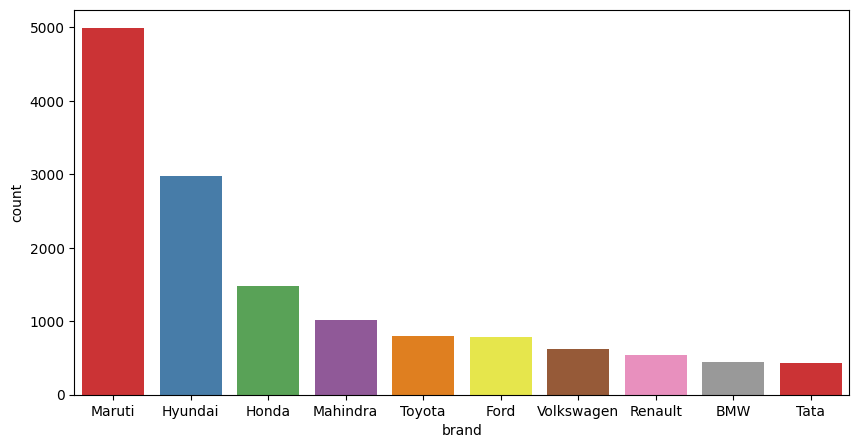

In [65]:
plt.figure(figsize=(10,5))
sns.countplot(x = "brand", data = df, palette="Set1",order=df["brand"].value_counts().head(10).index)

In [66]:
# average mean of maruti brand

maruti = df[df['brand'] == "Maruti"]
maruti["selling_price"].mean()


487089.3179086539

In [67]:
df[df['selling_price']==(df.groupby('brand').selling_price.max()).max()]['brand']

15409    Ferrari
Name: brand, dtype: object

In [68]:
df[df["selling_price"]==(df.groupby('brand').selling_price.max()).max()].brand

15409    Ferrari
Name: brand, dtype: object

In [69]:
# Top most costlier brand on dataset
max_brand_price= df.groupby('brand').selling_price.max()
max_brand_name = df[df["selling_price"]==max_brand_price.max()]
max_brand_name['brand']

15409    Ferrari
Name: brand, dtype: object

In [70]:
df.groupby('brand').selling_price.max().sort_values(ascending=False).head(10)


brand
Ferrari          39500000
Rolls-Royce      24200000
Bentley          14500000
Mercedes-Benz    13000000
Porsche          11100000
Land Rover        9200000
BMW               8500000
Volvo             8195000
Lexus             8000000
Audi              6800000
Name: selling_price, dtype: int64

In [71]:
# Top 10 most costlier brand on 
max_brand_price= df.groupby('brand').selling_price.max()
top_10_expensive_cars=max_brand_price.sort_values(ascending=False).head(10)
top_10_expensive_cars


brand
Ferrari          39500000
Rolls-Royce      24200000
Bentley          14500000
Mercedes-Benz    13000000
Porsche          11100000
Land Rover        9200000
BMW               8500000
Volvo             8195000
Lexus             8000000
Audi              6800000
Name: selling_price, dtype: int64

               selling_price
brand                       
Ferrari             39500000
Rolls-Royce         24200000
Bentley             14500000
Mercedes-Benz       13000000
Porsche             11100000
Land Rover           9200000
BMW                  8500000
Volvo                8195000
Lexus                8000000
Audi                 6800000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Ferrari'),
  Text(1, 0, 'Rolls-Royce'),
  Text(2, 0, 'Bentley'),
  Text(3, 0, 'Mercedes-Benz'),
  Text(4, 0, 'Porsche'),
  Text(5, 0, 'Land Rover'),
  Text(6, 0, 'BMW'),
  Text(7, 0, 'Volvo'),
  Text(8, 0, 'Lexus'),
  Text(9, 0, 'Audi')])

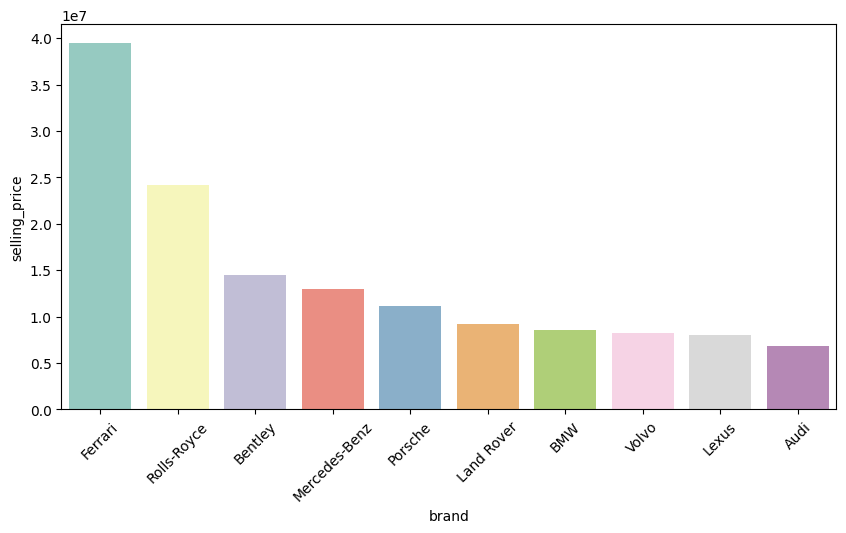

In [72]:
plt.figure(figsize=(10,5))
top_10 = top_10_expensive_cars.to_frame()
print(top_10)
sns.barplot(x = top_10.index, y = top_10['selling_price'], palette='Set3')
plt.xticks(rotation=45)


In [73]:
df.groupby('car_name').selling_price.max().sort_values(ascending=False).head(10).to_frame()

,selling_price
car_name,
Ferrari GTC4Lusso,39500000
Rolls-Royce Ghost,24200000
Bentley Continental,14500000
Mercedes-Benz S-Class,13000000
Porsche Cayenne,11100000
Land Rover Rover,9200000
BMW 7,8500000
BMW Z4,8250000
Volvo XC,8195000


Top 10 costlier cars in dataset

In [74]:
car = df.groupby('car_name').selling_price.max()
car = car.to_frame().sort_values('selling_price',ascending=False)[:10]
car

,selling_price
car_name,
Ferrari GTC4Lusso,39500000
Rolls-Royce Ghost,24200000
Bentley Continental,14500000
Mercedes-Benz S-Class,13000000
Porsche Cayenne,11100000
Land Rover Rover,9200000
BMW 7,8500000
BMW Z4,8250000
Volvo XC,8195000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Ferrari GTC4Lusso'),
  Text(1, 0, 'Rolls-Royce Ghost'),
  Text(2, 0, 'Bentley Continental'),
  Text(3, 0, 'Mercedes-Benz S-Class'),
  Text(4, 0, 'Porsche Cayenne'),
  Text(5, 0, 'Land Rover Rover'),
  Text(6, 0, 'BMW 7'),
  Text(7, 0, 'BMW Z4'),
  Text(8, 0, 'Volvo XC'),
  Text(9, 0, 'BMW X5')])

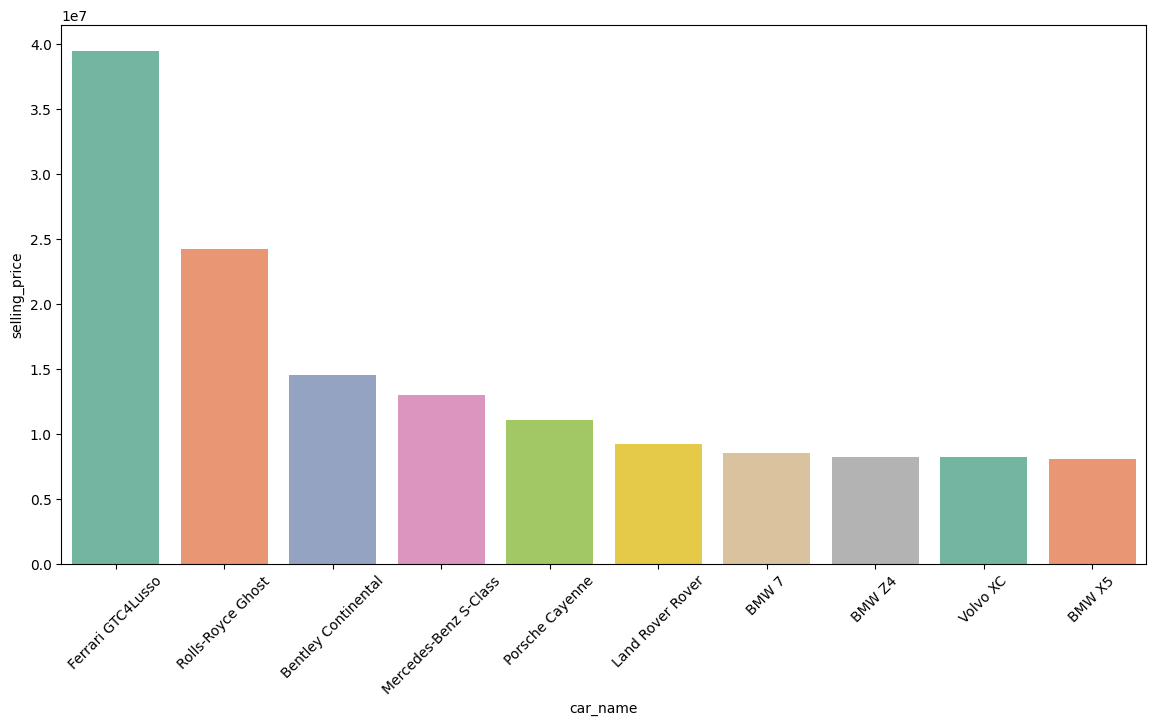

In [75]:
plt.figure(figsize=(14,7))

sns.barplot(x = car.index, y = car['selling_price'], palette="Set2")
plt.xticks(rotation=45)

Km driven vs vehicle age

(0.0, 1500001.0)

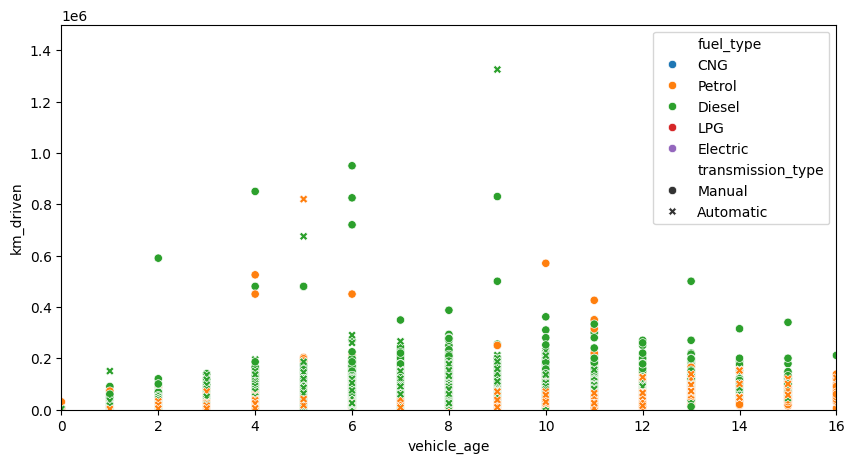

In [76]:
plt.figure(figsize=(10,5))
#plt.scatter(x=df['vehicle_age'], y=df['km_driven'], marker="+", color='g')
sns.scatterplot(x=df['vehicle_age'], y=df['km_driven'],hue=df['fuel_type'], style=df['transmission_type'])
plt.xlim(0,16)
plt.ylim(0,1500001)

In [77]:
max_km_driven= df.km_driven.max()
# index = df[df["km_driven"]==max_km_driven.max()].index
# index[0]
#df.drop(index[0], inplace=True)

In [78]:
df[df["km_driven"]==max_km_driven]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
13314,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.0,2179,140.0,7,1225000


In [79]:
max_vehicle_age = df['vehicle_age'].max()
max_vehicle_age

29

In [80]:
df[df['vehicle_age'] == max_vehicle_age]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
240,Maruti Alto,Maruti,Alto,29,22612,Dealer,Petrol,Manual,22.05,796,47.3,5,60000


<Axes: xlabel='km_driven', ylabel='vehicle_age'>

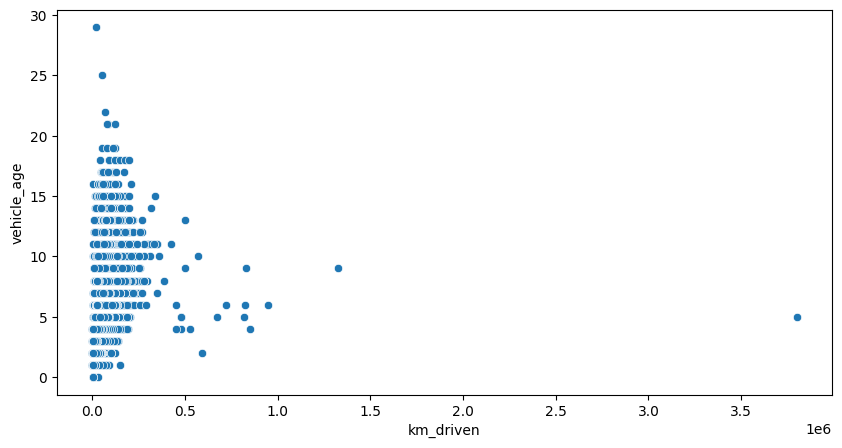

In [81]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['km_driven'],y=df['vehicle_age'])

In [82]:
df.groupby('brand').mileage.mean().sort_values(ascending=False).head(10).to_frame()

,mileage
brand,
Maruti,22.430980
Renault,22.099142
Datsun,21.215647
Lexus,20.846000
Ford,19.922620
Honda,19.908795
Maserati,19.820000
Tata,19.755279
Hyundai,19.588776


In [83]:
# top 10 mileage based on brand on dataset
mileage=df.groupby('brand')['mileage'].mean().sort_values(ascending=False).head(10)
mileage.to_frame()

,mileage
brand,
Maruti,22.430980
Renault,22.099142
Datsun,21.215647
Lexus,20.846000
Ford,19.922620
Honda,19.908795
Maserati,19.820000
Tata,19.755279
Hyundai,19.588776


Text(0, 0.5, 'Mileage in kmpl')

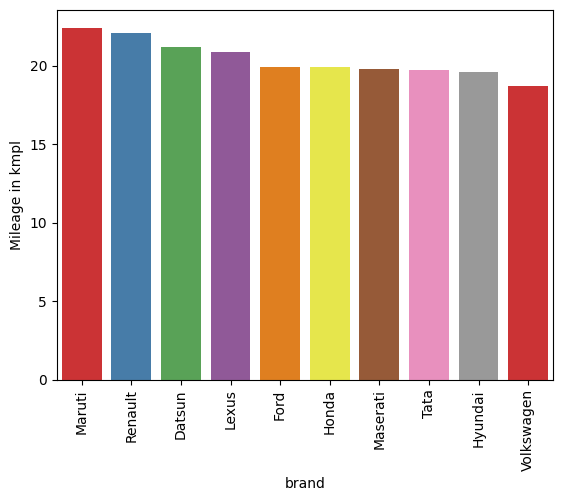

In [84]:
sns.barplot(x=mileage.index,y = mileage.values, palette='Set1')
plt.xticks(rotation= 90)
plt.ylabel('Mileage in kmpl')

In [85]:
mileage_car = df.groupby('car_name')['mileage'].mean().sort_values(ascending=False).head(10)
mileage_car

car_name
Tata Tiago          24.625103
Maruti Ciaz         24.289046
Maruti Vitara       24.231932
Renault KWID        24.037810
Maruti Celerio      23.703502
Maruti Dzire VXI    23.512941
Maruti Dzire LXI    23.260000
Maruti Dzire ZXI    23.260000
Ford Aspire         22.993846
Maruti Swift        22.719910
Name: mileage, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Tata Tiago'),
  Text(1, 0, 'Maruti Ciaz'),
  Text(2, 0, 'Maruti Vitara'),
  Text(3, 0, 'Renault KWID'),
  Text(4, 0, 'Maruti Celerio'),
  Text(5, 0, 'Maruti Dzire VXI'),
  Text(6, 0, 'Maruti Dzire LXI'),
  Text(7, 0, 'Maruti Dzire ZXI'),
  Text(8, 0, 'Ford Aspire'),
  Text(9, 0, 'Maruti Swift')])

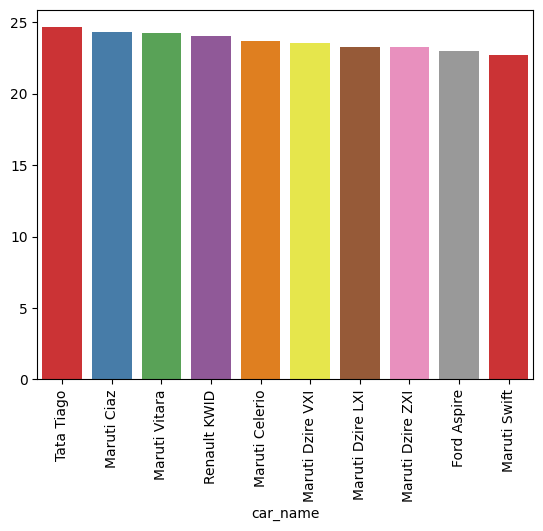

In [86]:
sns.barplot(x=mileage_car.index,y=mileage_car.values, palette='Set1')
plt.xticks(rotation= 90)

# km_driven vs selling price

(-100000.0, 15000000.0)

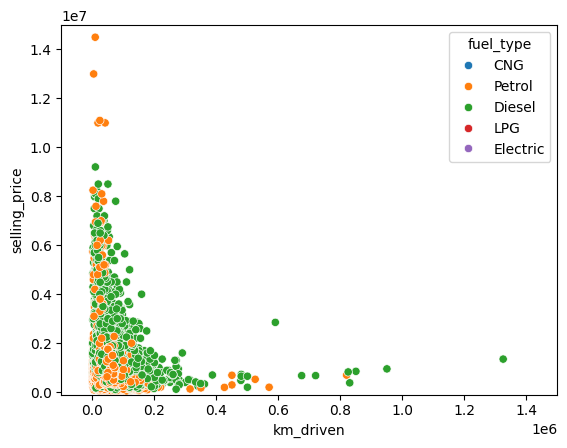

In [87]:
sns.scatterplot(x=df['km_driven'],y=df['selling_price'], data=df, hue="fuel_type")
plt.xlim(-100000,1500000)
plt.ylim(-100000,15000000)

Brand vs selling price

In [88]:
brand_price= df.groupby('brand').selling_price.mean().sort_values(ascending=False)
brand_price.to_frame()

,selling_price
brand,
Ferrari,3.950000e+07
Rolls-Royce,2.420000e+07
Bentley,9.266667e+06
Maserati,6.100000e+06
Porsche,5.161190e+06
Lexus,5.146500e+06
Mercedes-AMG,5.100000e+06
Land Rover,3.823902e+06
Volvo,3.729700e+06


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, 'Ferrari'),
  Text(1, 0, 'Rolls-Royce'),
  Text(2, 0, 'Bentley'),
  Text(3, 0, 'Maserati'),
  Text(4, 0, 'Porsche'),
  Text(5, 0, 'Lexus'),
  Text(6, 0, 'Mercedes-AMG'),
  Text(7, 0, 'Land Rover'),
  Text(8, 0, 'Volvo'),
  Text(9, 0, 'BMW'),
  Text(10, 0, 'Jaguar'),
  Text(11, 0, 'Mercedes-Benz'),
  Text(12, 0, 'Mini'),
  Text(13, 0, 'Audi'),
  Text(14, 0, 'ISUZU'),
  Text(15, 0, 'Jeep'),
  Text(16, 0, 'MG'),
  Text(17, 0, 'Kia'),
  Text(18, 0, 'Toyota'),
  Text(19, 0, 'Isuzu'),
  Text(20, 0, 'Nissan'),
  Text(21, 0, 'Mahindra'),
  Text(22, 0, 'Skoda'),
  Text(23, 0, 'Force'),
  Text(24, 0, 'Tata'),
  Text(25, 0, 'Ford'),
  Text(26, 0, 'Honda'),
  Text(27, 0, 'Hyundai'),
  Text(28, 0, 'Volkswagen'),
  Text(29, 0, 'Maruti'),
  Text(30, 0, 'Renault'),
  Text(31, 0, 'Datsun')])

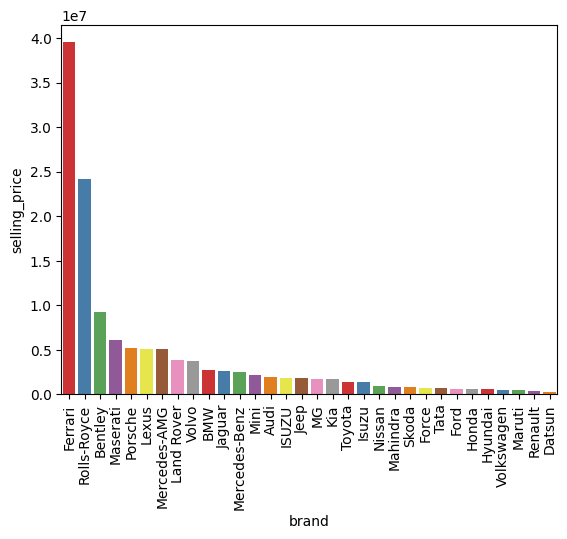

In [89]:
sns.barplot(brand_price, palette="Set1")
plt.xticks(rotation=90)

Brand vs Km driven

In [90]:
df.groupby('brand').km_driven.mean().sort_values(ascending=False).index

Index(['Toyota', 'Isuzu', 'Mahindra', 'Land Rover', 'Skoda', 'Volkswagen',
       'Volvo', 'Force', 'Mercedes-Benz', 'Audi', 'Porsche', 'Ford', 'ISUZU',
       'Honda', 'Maruti', 'BMW', 'Hyundai', 'Tata', 'Renault', 'Jaguar',
       'Nissan', 'Jeep', 'Datsun', 'Mini', 'Lexus', 'Bentley', 'Mercedes-AMG',
       'Maserati', 'MG', 'Kia', 'Rolls-Royce', 'Ferrari'],
      dtype='object', name='brand')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, 'Toyota'),
  Text(1, 0, 'Isuzu'),
  Text(2, 0, 'Mahindra'),
  Text(3, 0, 'Land Rover'),
  Text(4, 0, 'Skoda'),
  Text(5, 0, 'Volkswagen'),
  Text(6, 0, 'Volvo'),
  Text(7, 0, 'Force'),
  Text(8, 0, 'Mercedes-Benz'),
  Text(9, 0, 'Audi'),
  Text(10, 0, 'Porsche'),
  Text(11, 0, 'Ford'),
  Text(12, 0, 'ISUZU'),
  Text(13, 0, 'Honda'),
  Text(14, 0, 'Maruti'),
  Text(15, 0, 'BMW'),
  Text(16, 0, 'Hyundai'),
  Text(17, 0, 'Tata'),
  Text(18, 0, 'Renault'),
  Text(19, 0, 'Jaguar'),
  Text(20, 0, 'Nissan'),
  Text(21, 0, 'Jeep'),
  Text(22, 0, 'Datsun'),
  Text(23, 0, 'Mini'),
  Text(24, 0, 'Lexus'),
  Text(25, 0, 'Bentley'),
  Text(26, 0, 'Mercedes-AMG'),
  Text(27, 0, 'Maserati'),
  Text(28, 0, 'MG'),
  Text(29, 0, 'Kia'),
  Text(30, 0, 'Rolls-Royce'),
  Text(31, 0, 'Ferrari')])

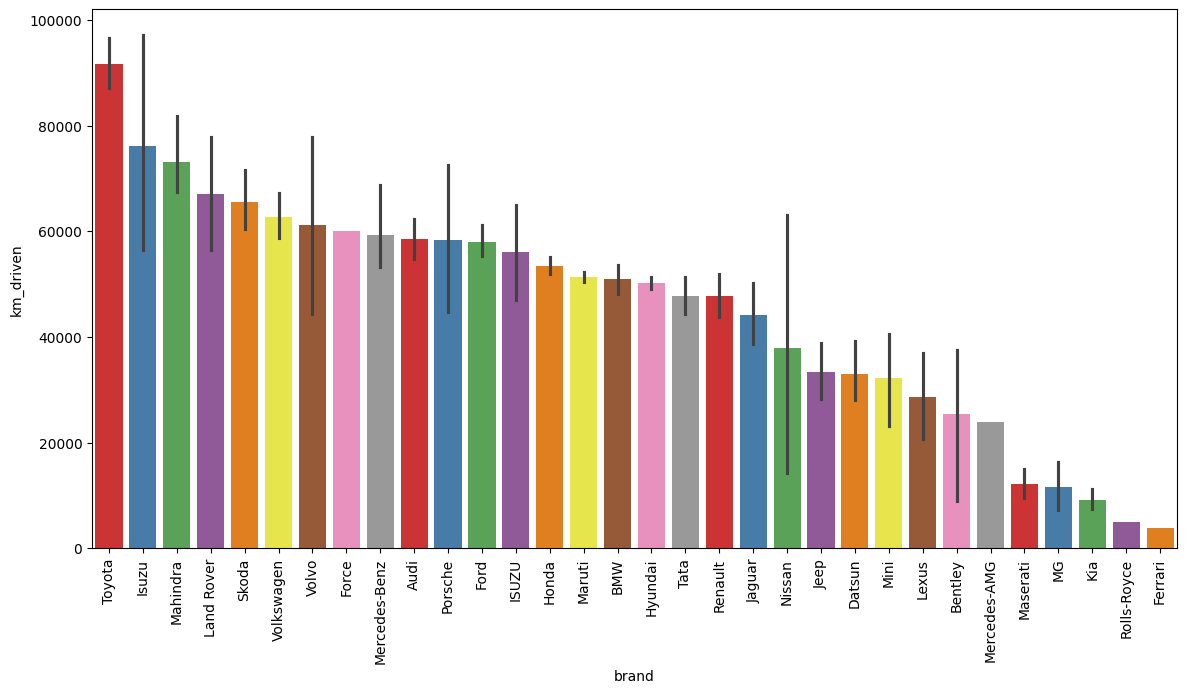

In [91]:
plt.figure(figsize=(14,7))
sns.barplot(x=df['brand'], y= df['km_driven'], palette="Set1", order=df.groupby('brand').km_driven.mean().sort_values(ascending=False).index)
plt.xticks(rotation=90)



<Axes: xlabel='selling_price', ylabel='Density'>

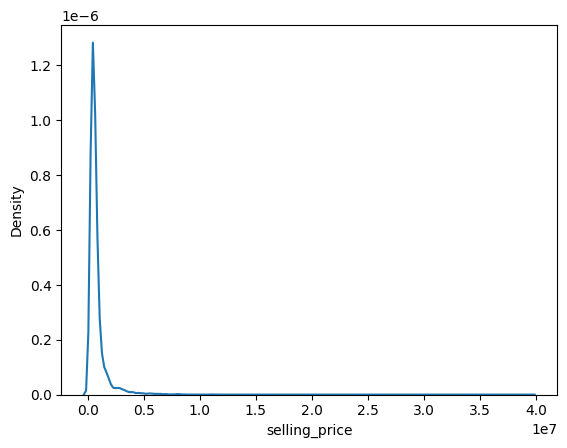

In [92]:

sns.kdeplot(x=df['selling_price'], data= df)

In [93]:
# fuel type vs selling price
fuel = df.groupby('fuel_type')['selling_price'].median().sort_values(ascending=False)
fuel.to_frame()

,selling_price
fuel_type,
Electric,1857500.0
Diesel,700000.0
Petrol,460000.0
CNG,370000.0
LPG,182500.0


<Axes: xlabel='fuel_type'>

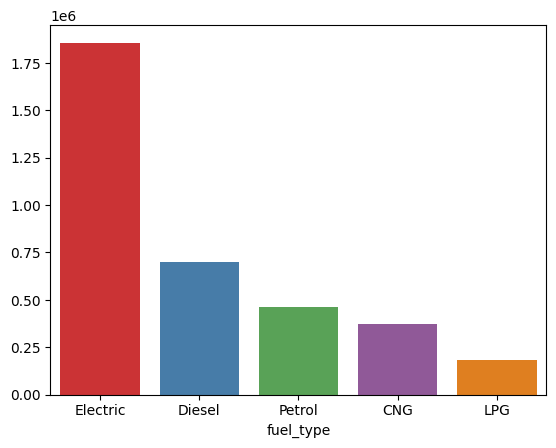

In [94]:
sns.barplot(x = fuel.index, y=fuel.values, palette="Set1")

<Axes: xlabel='fuel_type', ylabel='count'>

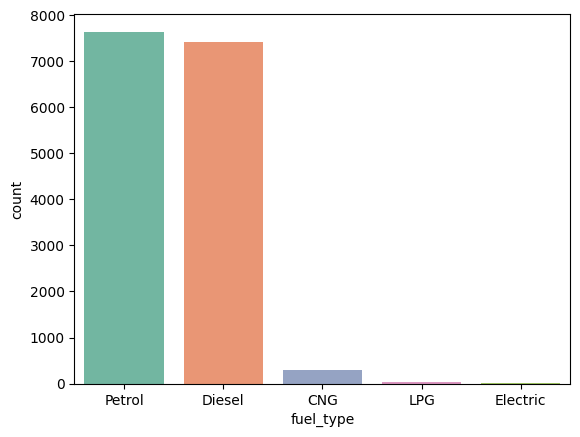

In [95]:
# most sold fuel type
sns.countplot(x=df['fuel_type'], palette='Set2', order=df['fuel_type'].value_counts().sort_values(ascending=False).index)

In [96]:
# Fuel type vs Mileage
fuel_mileage = df.groupby('fuel_type')['mileage'].mean().sort_values(ascending=False)

fuel_mileage.to_frame()

,mileage
fuel_type,
CNG,25.814651
Diesel,20.060030
Electric,19.160000
Petrol,19.123045
LPG,17.836364


<Axes: xlabel='fuel_type', ylabel='mileage'>

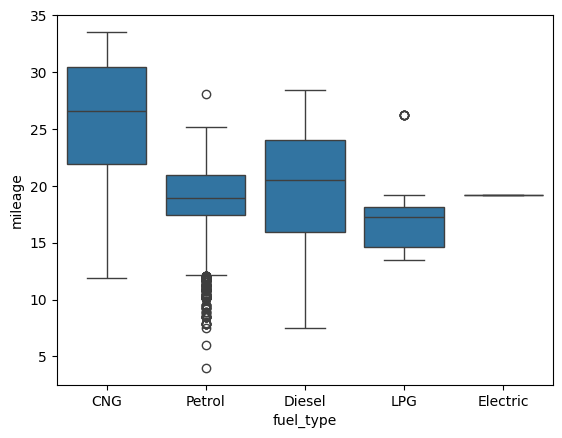

In [97]:
sns.boxplot(x= 'fuel_type', y='mileage', data = df)

<Axes: xlabel='mileage', ylabel='selling_price'>

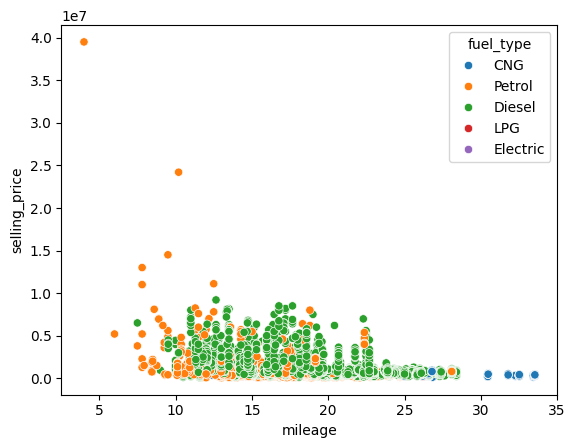

In [98]:
# mileage vs selling price
sns.scatterplot(x= 'mileage', y= 'selling_price', data=df,hue='fuel_type')


# Mileage distribution

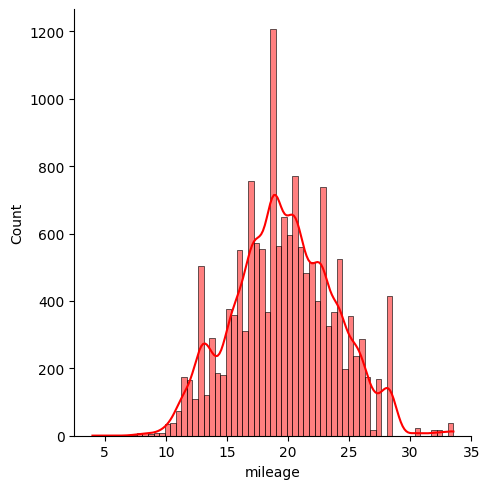

In [99]:
sns.displot(x= 'mileage',data=df, kde= True, color="red")

In [100]:
df.mileage.mean()

19.70115112581922

In [101]:
df.mileage.mean() - df.mileage.std()

15.529886521915055

In [102]:
df.mileage.mean() + df.mileage.std()

23.872415729723386

In [103]:
x=df.mileage.values >= 15.529886521915055 
y= df.mileage.values <=23.872415729723386

df[x&y]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
19,Maruti Alto,Maruti,Alto,9,28000,Dealer,Petrol,Manual,19.70,796,46.30,5,180000
20,Maruti Alto,Maruti,Alto,9,41321,Dealer,Petrol,Manual,19.70,796,46.30,5,185000
21,Maruti Alto,Maruti,Alto,14,52235,Dealer,Petrol,Manual,19.70,796,46.30,5,110000
22,Maruti Alto,Maruti,Alto,7,75001,Dealer,Petrol,Manual,19.70,796,46.30,5,175000
23,Maruti Alto,Maruti,Alto,11,48156,Dealer,Petrol,Manual,19.70,796,46.30,5,135000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15314,Maserati Quattroporte,Maserati,Quattroporte,5,9500,Dealer,Diesel,Automatic,19.23,2987,270.88,5,6000000
15328,Maserati Ghibli,Maserati,Ghibli,5,15000,Dealer,Diesel,Automatic,20.41,2987,271.00,5,6200000
15346,Porsche Panamera,Porsche,Panamera,7,33000,Dealer,Diesel,Automatic,17.85,2967,300.00,4,4875000
15377,BMW 7,BMW,7,4,18000,Dealer,Diesel,Automatic,17.66,2993,355.37,4,6900000


In [104]:
x=df.mileage.values >= 11.35862191801089
 
y= df.mileage.values <=28.04368033362755


df[x&y]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.40,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.40,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.40,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.40,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.40,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15380,Mercedes-Benz GL-Class,Mercedes-Benz,GL-Class,4,11500,Dealer,Petrol,Automatic,11.50,2996,362.00,5,7595000
15381,Mercedes-AMG C,Mercedes-AMG,C,4,24000,Dealer,Petrol,Automatic,11.90,2996,362.07,5,5100000
15397,Porsche Cayenne,Porsche,Cayenne,7,60000,Dealer,Diesel,Automatic,14.28,4134,385.00,5,3900000
15401,Porsche Cayenne,Porsche,Cayenne,4,36000,Dealer,Petrol,Automatic,12.50,3604,420.00,5,7800000


In [105]:
df.mileage.mean() - 2*df.mileage.std()

11.35862191801089

In [106]:
df.mileage.mean() + 2* df.mileage.std()

28.04368033362755

# vehicle age vs selling price

<Axes: xlabel='vehicle_age', ylabel='selling_price'>

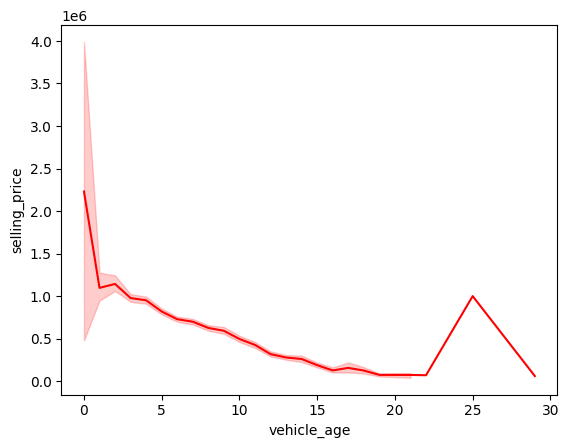

In [107]:
sns.lineplot(x= 'vehicle_age', y= 'selling_price', data=df, color= 'red')


# vehicle age vs mileage


In [108]:
vehicle_age =  df.groupby('vehicle_age')['mileage'].median().sort_values(ascending=False)
vehicle_age.to_frame().head()

,mileage
vehicle_age,
29,22.05
0,21.70
3,21.21
4,20.63
5,20.51


<Axes: xlabel='vehicle_age', ylabel='mileage'>

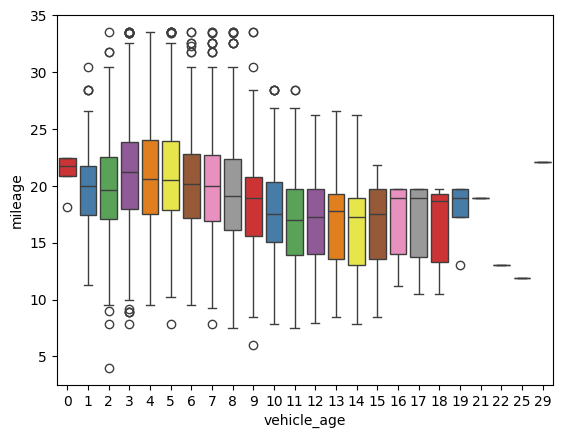

In [109]:
plt.subplots(figure=(14,7))
sns.boxplot(x=df['vehicle_age'], y=df['mileage'], palette='Set1')

# transmission type vs selling price

<Axes: xlabel='transmission_type', ylabel='selling_price'>

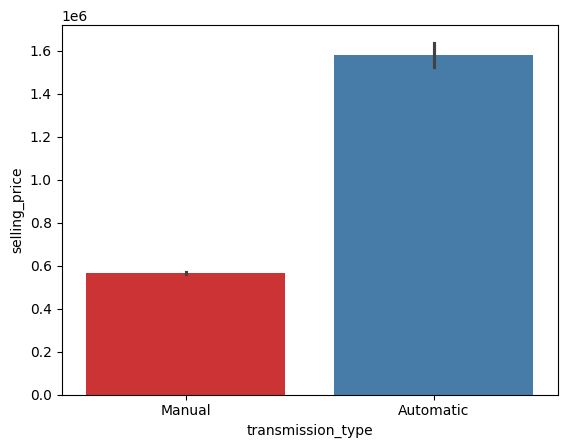

In [110]:
plt.subplots(figure=(14,7))
sns.barplot(x=df['transmission_type'], y=df['selling_price'], data=df, palette="Set1")


# transmission type vs mileage

<Axes: xlabel='transmission_type', ylabel='mileage'>

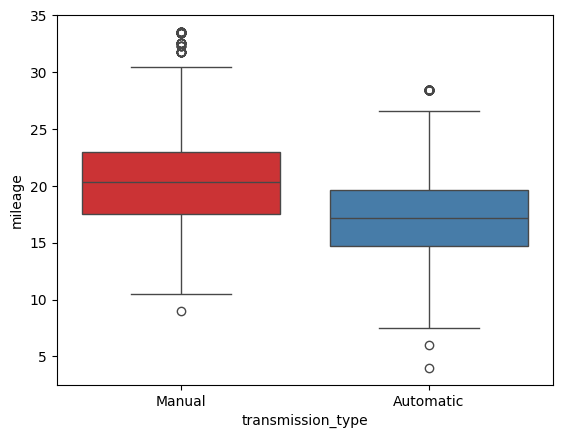

In [111]:
plt.subplots(figure=(14,7))
sns.boxplot(x=df['transmission_type'], y=df['mileage'], data=df, palette="Set1")


In [112]:
df.groupby('transmission_type').mileage.mean()

transmission_type
Automatic    17.391008
Manual       20.303206
Name: mileage, dtype: float64

# transmission type vs count

<Axes: xlabel='transmission_type', ylabel='count'>

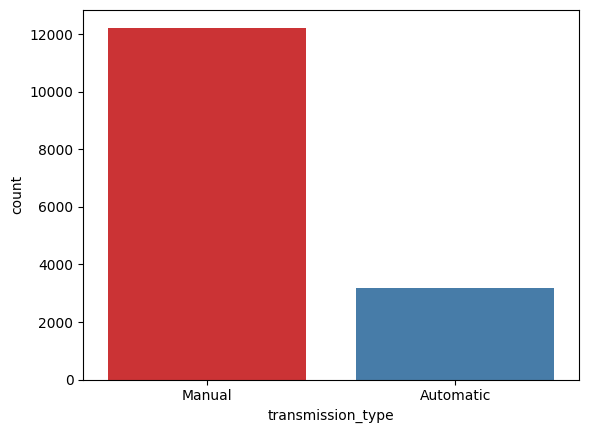

In [113]:
plt.subplots(figure=(14,7))
sns.countplot(x='transmission_type', data=df, palette="Set1")


# seller type vs count

<Axes: xlabel='seller_type', ylabel='count'>

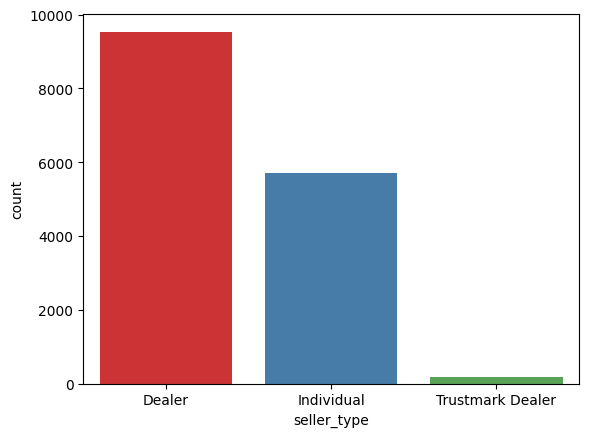

In [114]:
plt.subplots(figure=(14,7))
sns.countplot(x='seller_type', data=df, palette="Set1")


# seller type vs selling price

In [115]:
dealer = df.groupby('seller_type')['selling_price'].median().sort_values(ascending=False)
dealer.to_frame()

,selling_price
seller_type,
Dealer,591000.0
Trustmark Dealer,540000.0
Individual,507000.0


Text(0, 0.5, 'Median Selling Price')

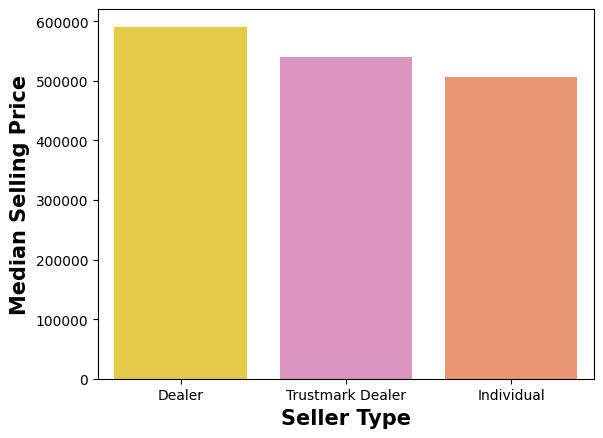

In [116]:
plt.subplots(figure=(14,7))
sns.barplot(x=dealer.index, y =dealer.values,palette="Set2_r")
plt.xlabel("Seller Type", weight="bold", fontsize= 15)
plt.ylabel("Median Selling Price", weight="bold", fontsize= 15)

# Final report


- The datatypes and columns names were right and there was 15411 rows and 13 columns.
- The selling price column is the target to predict i.e. Regression Problem
- There are outliers in the km_driven, engine, selling_price and max power
- Dealers are the highest sellers of the used cars.
- Skewness were found in few columns will be checked after handling the oultiers.
- vehicle age have negative effect on price.
- Manual cars are mostly sold and automatic cars has higher selling average than manual cars.
- Petrol is the most preffered vehicle of the fuel in used cars dataset, followed by diesel and LPG.

# Feature engineering

# outliers detection

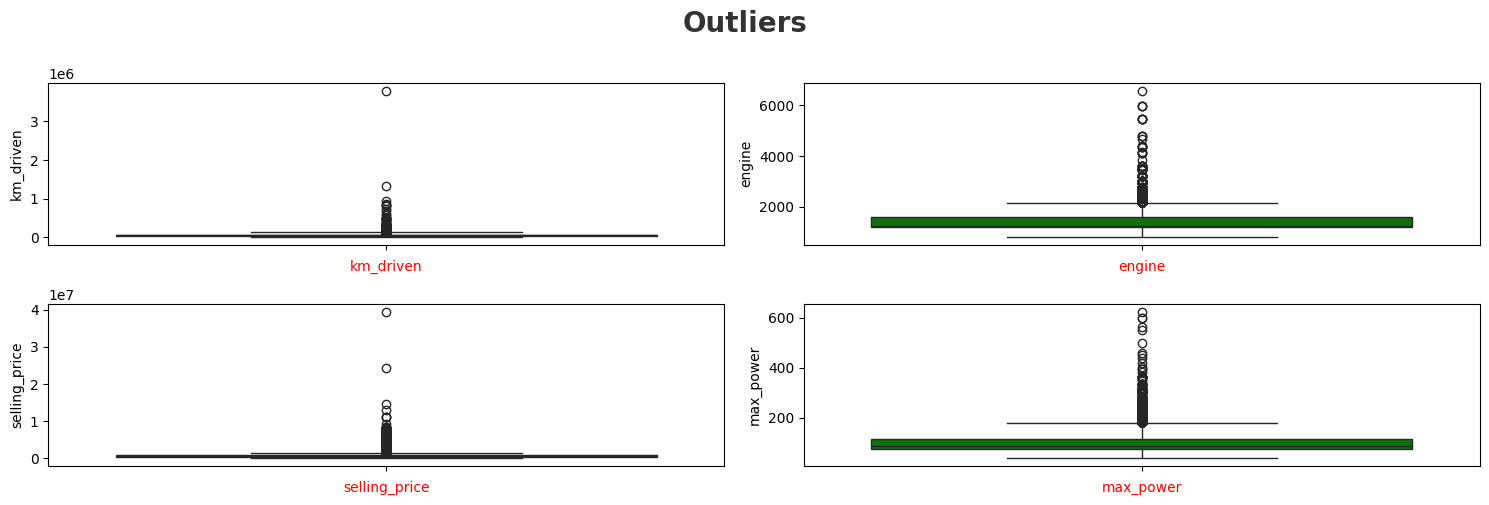

In [117]:
# Checking the Box plot after removing outliers
plt.figure(figsize=(15,5))
plt.suptitle("Outliers", fontsize=20, fontweight="bold",alpha=0.8,y=1)

outliers= ['km_driven', 'engine', 'selling_price','max_power']
# outliers= numeric_features
for i in range(len(outliers)):
    plt.subplot(2,2,i+1)
    sns.boxplot(df[outliers[i]], color='green')
    plt.xlabel(outliers[i], color= 'r')
    plt.tight_layout()

# Outlier detection and removal using IQR

lower = 1000
km = 200
upper = 1000000
km= 2000000

In [118]:
total_number_of_outliers_detected = []
outliers= ['km_driven', 'engine', 'selling_price','max_power']

def outlier_detection_and_removal(df1, col_name):

  print("-------------------------------------------------------------------------------\n")
  print(col_name)
  print()
  print()
  Q1 = df1[col_name].quantile(0.25)
  Q3 = df1[col_name].quantile(0.75)

  print(f"Q1={Q1}, Q3={Q3}")

  IQR = Q3 - Q1
  print(f"IQR={IQR}")

  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR
  print(f"lower_limit= {lower_limit}, upper_limit = {upper_limit}")

  outlier_detected = df1[(df1[col_name]<lower_limit) | (df1[col_name]>upper_limit)]
  total_number_of_outliers_detected.append(len(outlier_detected))
  #print(outlier_detected)

  df1 = df1[(df1[col_name]>=lower_limit) & (df1[col_name]<=upper_limit)] # outliers removed from each column
  return df1
  #print(df1)

df1 = df.copy()
for i in outliers:

  df1 = outlier_detection_and_removal(df1, i)
  print(df1)

print(total_number_of_outliers_detected,": total outliers=>",sum(total_number_of_outliers_detected))



-------------------------------------------------------------------------------

km_driven


Q1=30000.0, Q3=70000.0
IQR=40000.0
lower_limit= -30000.0, upper_limit = 130000.0
                  car_name        brand        model  vehicle_age  km_driven  \
0              Maruti Alto       Maruti         Alto            9      53800   
1              Maruti Alto       Maruti         Alto           11      11000   
2              Maruti Alto       Maruti         Alto           11      80000   
3              Maruti Alto       Maruti         Alto           10      57000   
4              Maruti Alto       Maruti         Alto           11      72000   
...                    ...          ...          ...          ...        ...   
15406  Bentley Continental      Bentley  Continental           10      30000   
15407    Rolls-Royce Ghost  Rolls-Royce        Ghost            4       5000   
15408  Bentley Continental      Bentley  Continental            9      37500   
15409    Ferrari GTC4Lusso

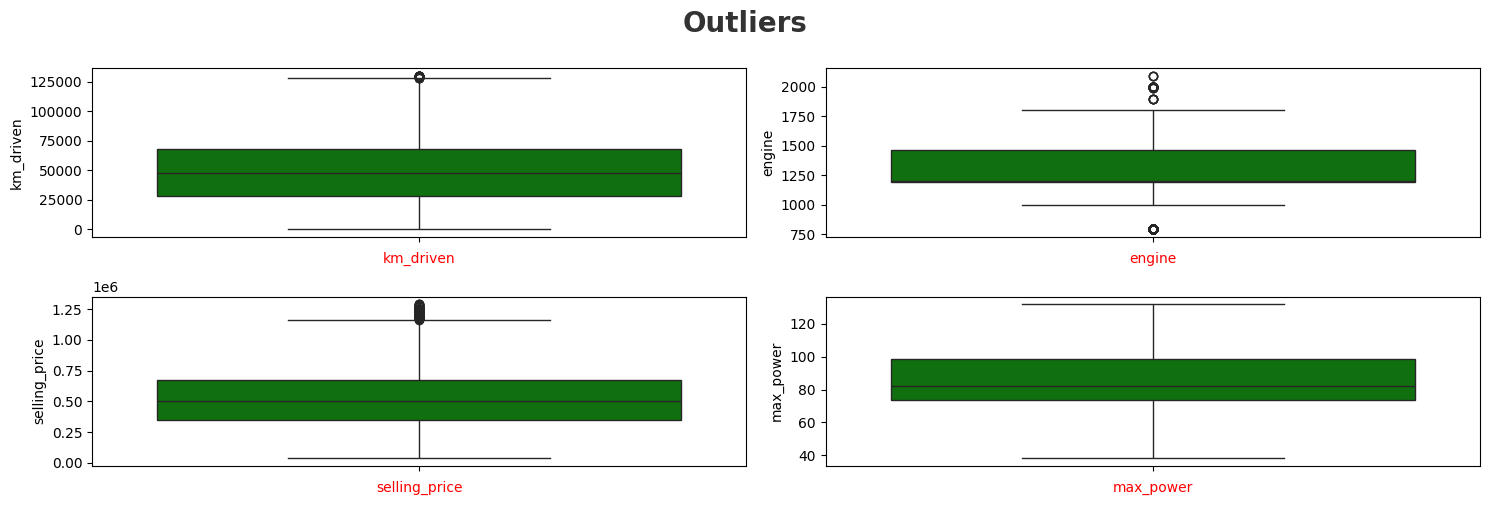

In [119]:
# Checking the Box plot after removing outliers
plt.figure(figsize=(15,5))
plt.suptitle("Outliers", fontsize=20, fontweight="bold",alpha=0.8,y=1)

outliers= ['km_driven', 'engine', 'selling_price','max_power']
# outliers= numeric_features
for i in range(len(outliers)):
    plt.subplot(2,2,i+1)
    sns.boxplot(df1[outliers[i]], color='green')
    plt.xlabel(outliers[i], color= 'r')
    plt.tight_layout()

In [120]:
df1

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12966,Toyota Innova,Toyota,Innova,11,105000,Dealer,Petrol,Manual,12.40,1998,132.0,8,675000
12967,Toyota Innova,Toyota,Innova,10,103000,Dealer,CNG,Manual,12.40,1998,132.0,8,1080000
12968,Toyota Innova,Toyota,Innova,11,92626,Dealer,Petrol,Manual,12.40,1998,132.0,8,440000
12969,Toyota Innova,Toyota,Innova,10,100000,Individual,CNG,Manual,12.40,1998,132.0,8,380000


In [121]:
df1.to_csv("cleaned_cars_dataset.csv", index=False)

In [122]:
df['max_power'].describe()

count    15411.000000
mean       100.588254
std         42.972979
min         38.400000
25%         74.000000
50%         88.500000
75%        117.300000
max        626.000000
Name: max_power, dtype: float64

In [123]:
q1 = df['max_power'].quantile(.25)
q3 = df['max_power'].quantile(.75)

In [124]:
iqr =q3-q1
iqr

43.3

In [125]:
lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr
lower_limit, upper_limit

(9.050000000000011, 182.25)

In [126]:
df2 =df[(df['max_power'] >= lower_limit) & (df['max_power'] <= upper_limit)]
df2

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.40,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.40,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.40,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.40,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.40,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14539,Mercedes-Benz E-Class,Mercedes-Benz,E-Class,4,35000,Dealer,Petrol,Automatic,12.00,1991,181.03,5,3945000
14540,Mercedes-Benz C-Class,Mercedes-Benz,C-Class,3,8000,Dealer,Petrol,Automatic,14.74,1991,181.04,5,3650000
14541,Mercedes-Benz C-Class,Mercedes-Benz,C-Class,9,51000,Dealer,Petrol,Automatic,14.74,1991,181.04,5,1190000
14542,Mercedes-Benz C-Class,Mercedes-Benz,C-Class,6,35000,Dealer,Petrol,Automatic,14.74,1991,181.04,5,2250000


<Axes: ylabel='max_power'>

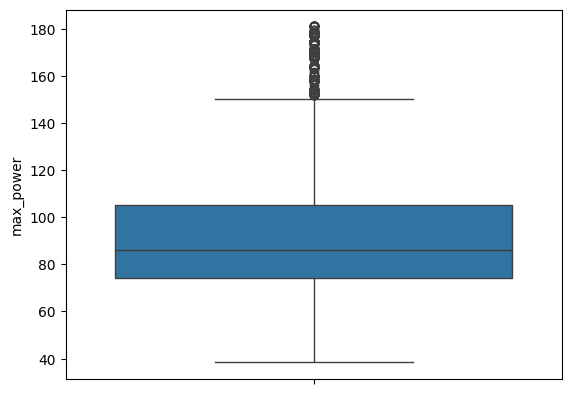

In [127]:
sns.boxplot(df2["max_power"])

In [128]:
df[(df['max_power'] <= lower_limit) | (df['max_power'] >= upper_limit)]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
14544,Hyundai Tucson,Hyundai,Tucson,4,62450,Dealer,Diesel,Automatic,16.38,1995,182.46,5,1649000
14545,Hyundai Tucson,Hyundai,Tucson,5,119775,Dealer,Diesel,Automatic,16.38,1995,182.46,5,1690000
14546,Hyundai Tucson,Hyundai,Tucson,3,35000,Individual,Diesel,Automatic,16.38,1995,182.46,5,2600000
14547,Hyundai Tucson,Hyundai,Tucson,4,70000,Individual,Diesel,Manual,18.42,1995,182.46,5,1700000
14548,Hyundai Tucson,Hyundai,Tucson,4,44000,Individual,Diesel,Manual,18.42,1995,182.46,5,1500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.60,5998,552.00,4,8100000
15407,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.20,6592,563.00,4,24200000
15408,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.00,5,5200000
15409,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.00,4,39500000


In [129]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000


# Removing unnecessary columns

In [130]:
df_model = pd.read_csv("cleaned_cars_dataset.csv")
df_model

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11918,Toyota Innova,Toyota,Innova,11,105000,Dealer,Petrol,Manual,12.40,1998,132.0,8,675000
11919,Toyota Innova,Toyota,Innova,10,103000,Dealer,CNG,Manual,12.40,1998,132.0,8,1080000
11920,Toyota Innova,Toyota,Innova,11,92626,Dealer,Petrol,Manual,12.40,1998,132.0,8,440000
11921,Toyota Innova,Toyota,Innova,10,100000,Individual,CNG,Manual,12.40,1998,132.0,8,380000


In [131]:
# df_model =  df.copy() # raw data
# df_model

In [132]:
df_model.drop(labels=['car_name', 'brand', 'model'], axis=1, inplace=True)

In [133]:
df_model

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...
11918,11,105000,Dealer,Petrol,Manual,12.40,1998,132.0,8,675000
11919,10,103000,Dealer,CNG,Manual,12.40,1998,132.0,8,1080000
11920,11,92626,Dealer,Petrol,Manual,12.40,1998,132.0,8,440000
11921,10,100000,Individual,CNG,Manual,12.40,1998,132.0,8,380000


In [134]:
df_model.dtypes

vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

# converting categorical data to numerical

using One Hot Encoding(get_dummies) to convert categorical data to numerical

In [135]:
df_model = pd.get_dummies(df_model, dtype='float')

In [136]:
df_model


,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,53800,26.83,796,38.4,5,235000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,11,11000,26.83,796,38.4,5,185000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,11,80000,26.83,796,38.4,5,150000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,10,57000,26.83,796,38.4,5,172000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,11,72000,26.83,796,38.4,5,125000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11918,11,105000,12.40,1998,132.0,8,675000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
11919,10,103000,12.40,1998,132.0,8,1080000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
11920,11,92626,12.40,1998,132.0,8,440000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
11921,10,100000,12.40,1998,132.0,8,380000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [137]:
df_model.dtypes

vehicle_age                       int64
km_driven                         int64
mileage                         float64
engine                            int64
max_power                       float64
seats                             int64
selling_price                     int64
seller_type_Dealer              float64
seller_type_Individual          float64
seller_type_Trustmark Dealer    float64
fuel_type_CNG                   float64
fuel_type_Diesel                float64
fuel_type_LPG                   float64
fuel_type_Petrol                float64
transmission_type_Automatic     float64
transmission_type_Manual        float64
dtype: object

# creating Feature Matrix(independent Variable) & Target variable (dependent Variable)

In [138]:
X = df_model.drop('selling_price', axis= 1) # independent variable
X

,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,53800,26.83,796,38.4,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,11,11000,26.83,796,38.4,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,11,80000,26.83,796,38.4,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,10,57000,26.83,796,38.4,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,11,72000,26.83,796,38.4,5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11918,11,105000,12.40,1998,132.0,8,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
11919,10,103000,12.40,1998,132.0,8,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
11920,11,92626,12.40,1998,132.0,8,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
11921,10,100000,12.40,1998,132.0,8,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [139]:
y = df_model['selling_price'] # target variable or dependent variable
y

0         235000
1         185000
2         150000
3         172000
4         125000
          ...   
11918     675000
11919    1080000
11920     440000
11921     380000
11922     650000
Name: selling_price, Length: 11923, dtype: int64

# checking important features

In [140]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [141]:
print("checking for feature importance")
print("-"*50)
print(model.feature_importances_)

checking for feature importance
--------------------------------------------------
[3.79967542e-01 8.27561310e-02 4.48907640e-02 1.28102248e-01
 2.81098860e-01 8.60409014e-03 5.16815122e-03 5.15288598e-03
 3.63705049e-04 8.43403538e-04 3.45269921e-02 4.04421694e-05
 1.16874639e-02 8.27128804e-03 8.52603296e-03]


# visualisation for feature importance

<Axes: >

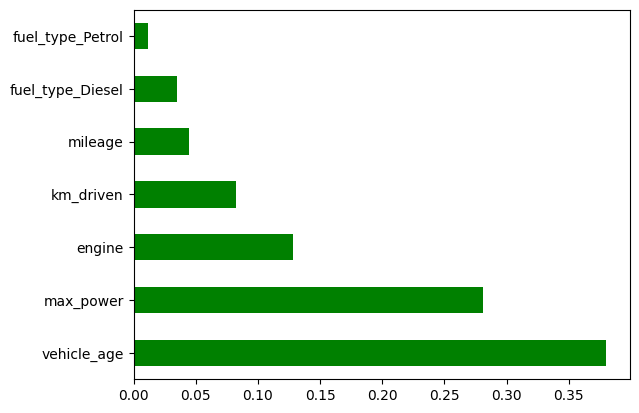

In [142]:
imp_features = pd.Series(model.feature_importances_, index = X.columns)
imp_features.nlargest(7).plot(kind='barh', color='g')

# Model Building and Evaluation

Train - test split

In [143]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [144]:
X_train

,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
8065,5,57437,22.54,1396,88.73,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7801,4,85000,22.10,1396,88.70,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5114,6,46000,22.00,1197,81.80,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1320,3,15000,20.51,998,67.00,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4339,11,69000,20.36,1197,78.90,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8202,6,18000,21.19,1396,88.73,5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
890,3,60000,21.94,1196,61.70,5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2046,9,32103,20.92,998,67.10,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
11760,9,90000,22.32,1582,126.30,5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [145]:
X_test

,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
4206,5,41256,25.32,1198,77.00,6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4032,2,30000,28.40,1248,74.02,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2292,9,40000,18.90,998,67.10,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1044,6,35000,19.44,1198,67.00,7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9479,4,17908,21.70,1498,98.96,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6990,5,52306,17.80,1198,86.70,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6773,7,58000,18.60,1197,85.80,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
10204,3,16000,18.10,1496,105.94,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2103,11,50000,20.92,998,67.10,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


# importing important libraries for Model Building

In [146]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [147]:
# from sklearn.model_selection import cross_val_score



In [148]:
# model = [LinearRegression(), SVR(), DecisionTreeRegressor(), RandomForestRegressor(), Ridge(), Lasso()]

# for mod in model:
#     pred=cross_val_score(mod, X,y, cv=5)
#     print(mod,pred, pred.mean())
#     print("score", "=", 1-pred.mean())

In [149]:
models = [LinearRegression, SVR, DecisionTreeRegressor, RandomForestRegressor,Ridge, Lasso]

mse=[]
rmse = []
evs =[]
r_square_score = []


for model in models:
    regressor = model().fit(X_train, y_train)
    pred = regressor.predict(X_test)
    # print(pred)
    mse.append(mean_squared_error(y_true=y_test, y_pred=pred))
    rmse.append(np.sqrt(mean_squared_error(y_true=y_test, y_pred=pred)))
    evs.append(explained_variance_score(y_true=y_test, y_pred=pred))
    r_square_score.append(r2_score(y_true=y_test, y_pred=pred))
               

# creating DataFrame for model camparison

In [150]:
ML_model_df = pd.DataFrame({"Model":['Linear Regression', 'Support vector Regression', 'Decision Tree Regressor',\
                                      'Random Forest Regressor', 'Ridge', 'Lasso'],
                                      'Mean Squarred Error':mse,
                                      'Root mean squared error': rmse,
                                      "Explained variance Error": evs,
                                      "R-Squared Score(Accuracy)": r_square_score})

ML_model_df.set_index("Model", inplace=True)
ML_model_df

,Mean Squarred Error,Root mean squared error,Explained variance Error,R-Squared Score(Accuracy)
Model,,,,
Linear Regression,1.444335e+10,120180.475360,0.745408,0.744892
Support vector Regression,5.753203e+10,239858.348017,0.000836,-0.016169
Decision Tree Regressor,1.018407e+10,100916.162205,0.820127,0.820122
Random Forest Regressor,6.285393e+09,79280.468798,0.889038,0.888983
Ridge,1.444344e+10,120180.852275,0.745406,0.744890
Lasso,1.444339e+10,120180.670493,0.745407,0.744891


In [151]:
model = RandomForestRegressor(n_estimators=200)
model.fit(X_train,y_train)


RandomForestRegressor(n_estimators=200)

In [152]:
model.predict(X_test)

array([ 487743.33333333,  795990.        ,  330630.        , ...,
       1019210.        ,  241545.3968254 ,  638162.38095238])

In [153]:
model.score(X_test, y_test)

0.8882296399625755

# result of model training
- RandomForest is giving best accuracy score of 92%.
- RandomForest>DecisionTree>LinearRegression>Ridge>Lasso>SVR

# Generating Pickle file - Saving Trained Model

In [154]:
import pickle

saved_models=[]

for model_class in models:
    model = model_class()
    regressor = model.fit(X_train, y_train)

    # Save the trained model to a pickle file
    model_filename = f"{model_class.__name__}_model.pkl"

    with open(model_filename, "wb") as model_file:
        pickle.dump(regressor, model_file)

    saved_models.append(model_filename)

In [155]:
saved_models

['LinearRegression_model.pkl',
 'SVR_model.pkl',
 'DecisionTreeRegressor_model.pkl',
 'RandomForestRegressor_model.pkl',
 'Ridge_model.pkl',
 'Lasso_model.pkl']

In [156]:
X_test

,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
4206,5,41256,25.32,1198,77.00,6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4032,2,30000,28.40,1248,74.02,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2292,9,40000,18.90,998,67.10,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1044,6,35000,19.44,1198,67.00,7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9479,4,17908,21.70,1498,98.96,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6990,5,52306,17.80,1198,86.70,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6773,7,58000,18.60,1197,85.80,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
10204,3,16000,18.10,1496,105.94,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2103,11,50000,20.92,998,67.10,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [157]:
val =[4,19093,18.16,1196,86.80,5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0]
import pickle

with open('RandomForestRegressor_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [158]:
model.predict([val])

array([542346.66666667])

In [159]:
y_test

4206     449000
4032     780000
2292     240000
1044     400000
9479     730000
          ...  
6990     465000
6773     370000
10204    950000
2103     225000
5295     625000
Name: selling_price, Length: 2385, dtype: int64

In [160]:
value=[6,65000,17.80,1497,117.30,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0]

In [161]:
import pickle

with open('RandomForestRegressor_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [162]:
model

RandomForestRegressor()

In [163]:
model.predict([value])

array([723590.])

In [164]:
model.score(X_test,y_test)

0.8887346463333181

In [165]:
model.predict(X_test)


array([ 479410.        ,  802470.        ,  335150.        , ...,
       1017100.        ,  237085.38961039,  641053.33333333])

In [166]:
val = [5,3800000,16.00,2179,140.00,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0]

In [167]:
val=[11,43000,19.70,796,46.30,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0]
#val= [6,10000,20.85,1197,83.14,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0]

In [168]:
# for model in saved_models:
#     regressor = model().fit(X_train, y_train)
#     pred = model.predict([val])
#     print(pred)

In [169]:
import pickle

with open('RandomForestRegressor_model.pkl', 'rb') as f:
    data = pickle.load(f)

In [170]:
data

RandomForestRegressor()

In [171]:
data.predict([val])

array([158121.66666667])

In [172]:
X_test

,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
4206,5,41256,25.32,1198,77.00,6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4032,2,30000,28.40,1248,74.02,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2292,9,40000,18.90,998,67.10,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1044,6,35000,19.44,1198,67.00,7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9479,4,17908,21.70,1498,98.96,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6990,5,52306,17.80,1198,86.70,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6773,7,58000,18.60,1197,85.80,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
10204,3,16000,18.10,1496,105.94,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2103,11,50000,20.92,998,67.10,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [173]:
y_test

4206     449000
4032     780000
2292     240000
1044     400000
9479     730000
          ...  
6990     465000
6773     370000
10204    950000
2103     225000
5295     625000
Name: selling_price, Length: 2385, dtype: int64